# Library imports

In [1]:
#Data modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#Modelling imports
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scikitplot.cluster import plot_elbow_curve
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

# EDA

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Look at columns and datatypes
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Size of data
data.shape

(7043, 21)

In [6]:
#Any missing values?
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Any duplicates?
data.duplicated().sum()

0

In [8]:
#See sample rows:
data.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [9]:
#Summarise columns; for objects show value counts, otherwise describe
cols = data.columns
for col in cols:
    print(col)
    if data[col].dtype == 'O':
        print(data[col].value_counts())
    else:
        print(data[col].describe())
    print('\n')

customerID
5149-TGWDZ    1
5032-USPKF    1
3707-GNWHM    1
2685-SREOM    1
9229-RQABD    1
             ..
7359-SSBJK    1
5835-BEQEU    1
2346-DJQTB    1
5899-MQZZL    1
9095-HFAFX    1
Name: customerID, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone

In [10]:
#Total charges columns should be a float but is currently a string.
data['TotalCharges'][0]

'29.85'

In [11]:
#Initial setting astype float resulted in error - look for instances where error is.
for x in data['TotalCharges']:
    try:
        float(x)
    except:
        print(x)

In [12]:
#All errors are created by blank fields. Review relevant rows of data
mask = data['TotalCharges'] == ' '
data[mask].T

488                  753   \
customerID                       4472-LVYGI           3115-CZMZD   
gender                               Female                 Male   
SeniorCitizen                             0                    0   
Partner                                 Yes                   No   
Dependents                              Yes                  Yes   
tenure                                    0                    0   
PhoneService                             No                  Yes   
MultipleLines              No phone service                   No   
InternetService                         DSL                   No   
OnlineSecurity                          Yes  No internet service   
OnlineBackup                             No  No internet service   
DeviceProtection                        Yes  No internet service   
TechSupport                             Yes  No internet service   
StreamingTV                             Yes  No internet service   
StreamingMovies                          No  No internet service   
Contract                           Two year             Two year   
PaperlessBilling                        Yes                   No   
PaymentMethod     Bank transfer (automatic)         Mailed check   
MonthlyCharges                        52.55                20.25   
TotalCharges                                                       
Churn                                    No                   No   

                          936                  1082                     1340  \
customerID          5709-LVOEQ           4367-NUYAO               1371-DWPAZ   
gender                  Female                 Male                   Female   
SeniorCitizen                0                    0                        0   
Partner                    Yes                  Yes                      Yes   
Dependents                 Yes                  Yes                      Yes   
tenure                       0                    0                        0   
PhoneService               Yes                  Yes                       No   
MultipleLines               No                  Yes         No phone service   
InternetService            DSL                   No                      DSL   
OnlineSecurity             Yes  No internet service                      Yes   
OnlineBackup               Yes  No internet service                      Yes   
DeviceProtection           Yes  No internet service                      Yes   
TechSupport                 No  No internet service                      Yes   
StreamingTV                Yes  No internet service                      Yes   
StreamingMovies            Yes  No internet service                       No   
Contract              Two year             Two year                 Two year   
PaperlessBilling            No                   No                       No   
PaymentMethod     Mailed check         Mailed check  Credit card (automatic)   
MonthlyCharges           80.85                25.75                    56.05   
TotalCharges                                                                   
Churn                       No                   No                       No   

                                 3331                 3826  \
customerID                 7644-OMVMY           3213-VVOLG   
gender                           Male                 Male   
SeniorCitizen                       0                    0   
Partner                           Yes                  Yes   
Dependents                        Yes                  Yes   
tenure                              0                    0   
PhoneService                      Yes                  Yes   
MultipleLines                      No                  Yes   
InternetService                    No                   No   
OnlineSecurity    No internet service  No internet service   
OnlineBackup      No internet service  No internet service   
DeviceProtection  No internet service

In [13]:
#These customers look like new customers given tenure equal to zero for all. 
#Drop these rows as a result
data.drop(data[mask].index, inplace = True)

In [14]:
#Now convert columns to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

No further analysis required. Data looks clean and ready for preparation for modelling.

# Data preparation

Start preparing data for modelling. Begin by creating a dummified version of variables. Start by making
any categorical columns which are currently integers into objects to allow for clearer interpretation later on.

In [15]:
data['SeniorCitizen'] = ['Yes' if entry == 1 else 'No' for entry in data['SeniorCitizen']]

In [16]:
#Drop customerID as not required for modelling
data.drop(columns=['customerID'], inplace = True)

In [17]:
data_dum = pd.get_dummies(data, drop_first = True)

In [18]:
data_dum.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [19]:
len(data_dum.columns)

31

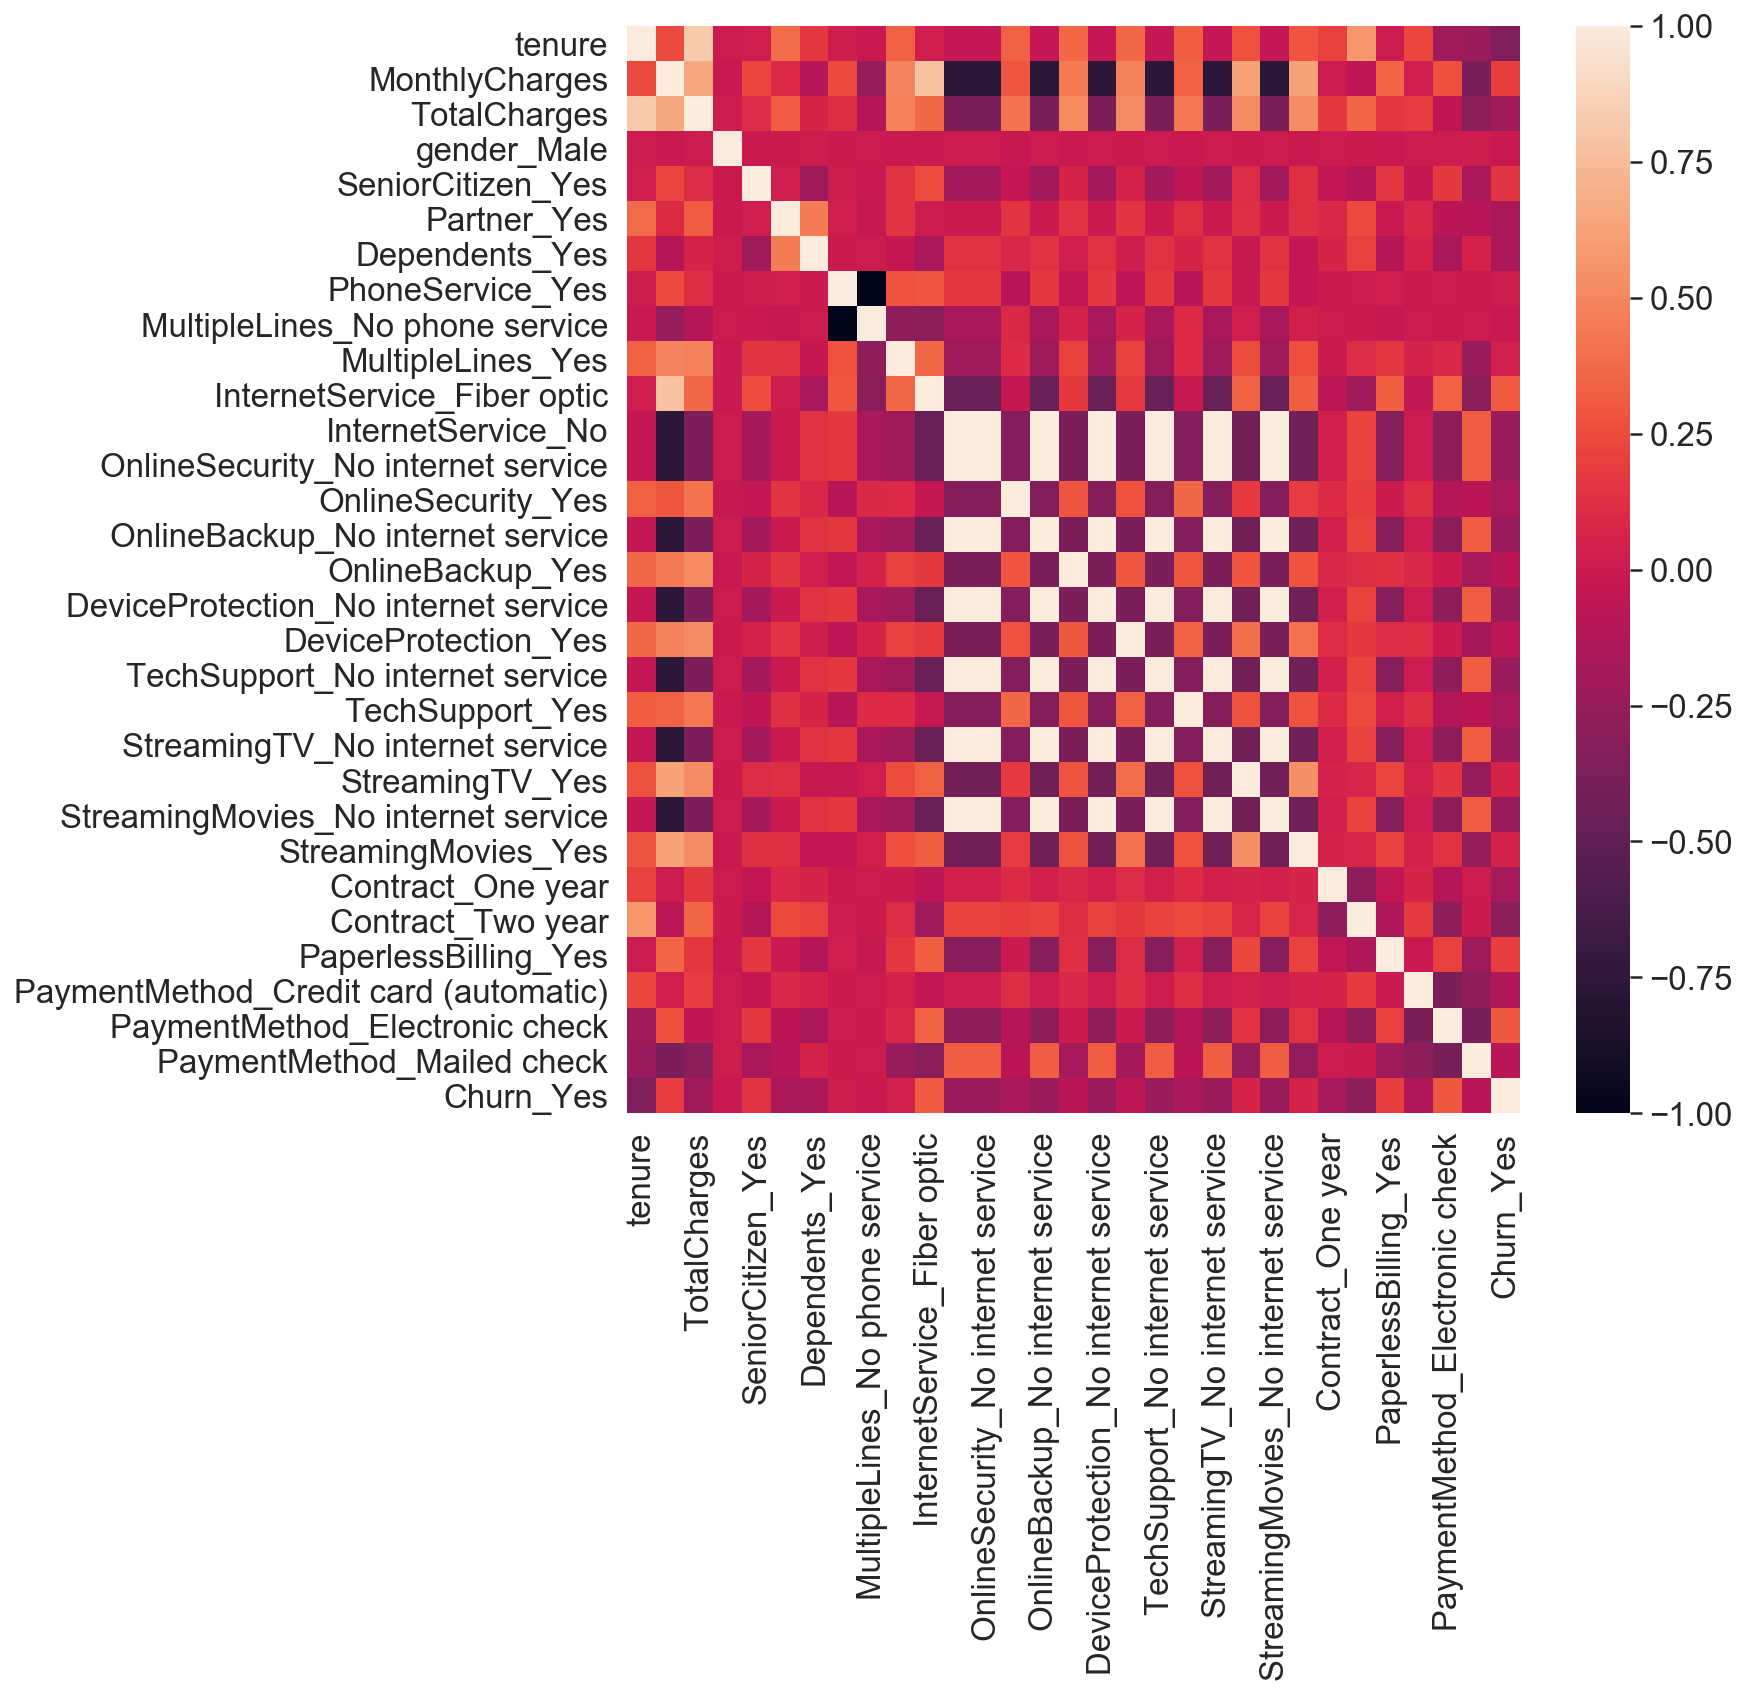

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data_dum.corr());

Pockets of correlation between variables although largely look like where customer has no internet service and therefore related services are also not present e.g. online backup, streaming TV etc. No cause for concern at this stage although suggests one customer grouping being those with internet service and those without.

In [21]:
#Set up X (features) and y (target) data
X = data_dum.copy()
y = X.pop('Churn_Yes')

In [22]:
#Set up train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [23]:
#Rescale data set
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [24]:
#Calculate baseline for modelling
y_test.value_counts(normalize=True)

0    0.734123
1    0.265877
Name: Churn_Yes, dtype: float64

Baseline score is 0.73.

Data now ready for modelling

# Logistic Regression modelling

### First model using basic logistic regression approach

In [25]:
model = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score = cross_val_score(model, X_train, y_train, cv=5)
cv_score

array([0.80507614, 0.79187817, 0.79268293, 0.79979675, 0.82926829])

In [26]:
#Mean cross-validation score
cv_score.mean()

0.8037404564400974

In [27]:
#Standard deviatin of scores
np.std(cv_score)

0.013652765692617379

In [28]:
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
model.score(X_test, y_test)

0.8061611374407583

In [29]:
conmat = np.array(confusion_matrix(y_test, yhat_test, labels=[0,1]))
confusion = pd.DataFrame(conmat, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion

pred_not_churn  pred_churn
is_not_churn            1382         167
is_churn                 242         319

In [30]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



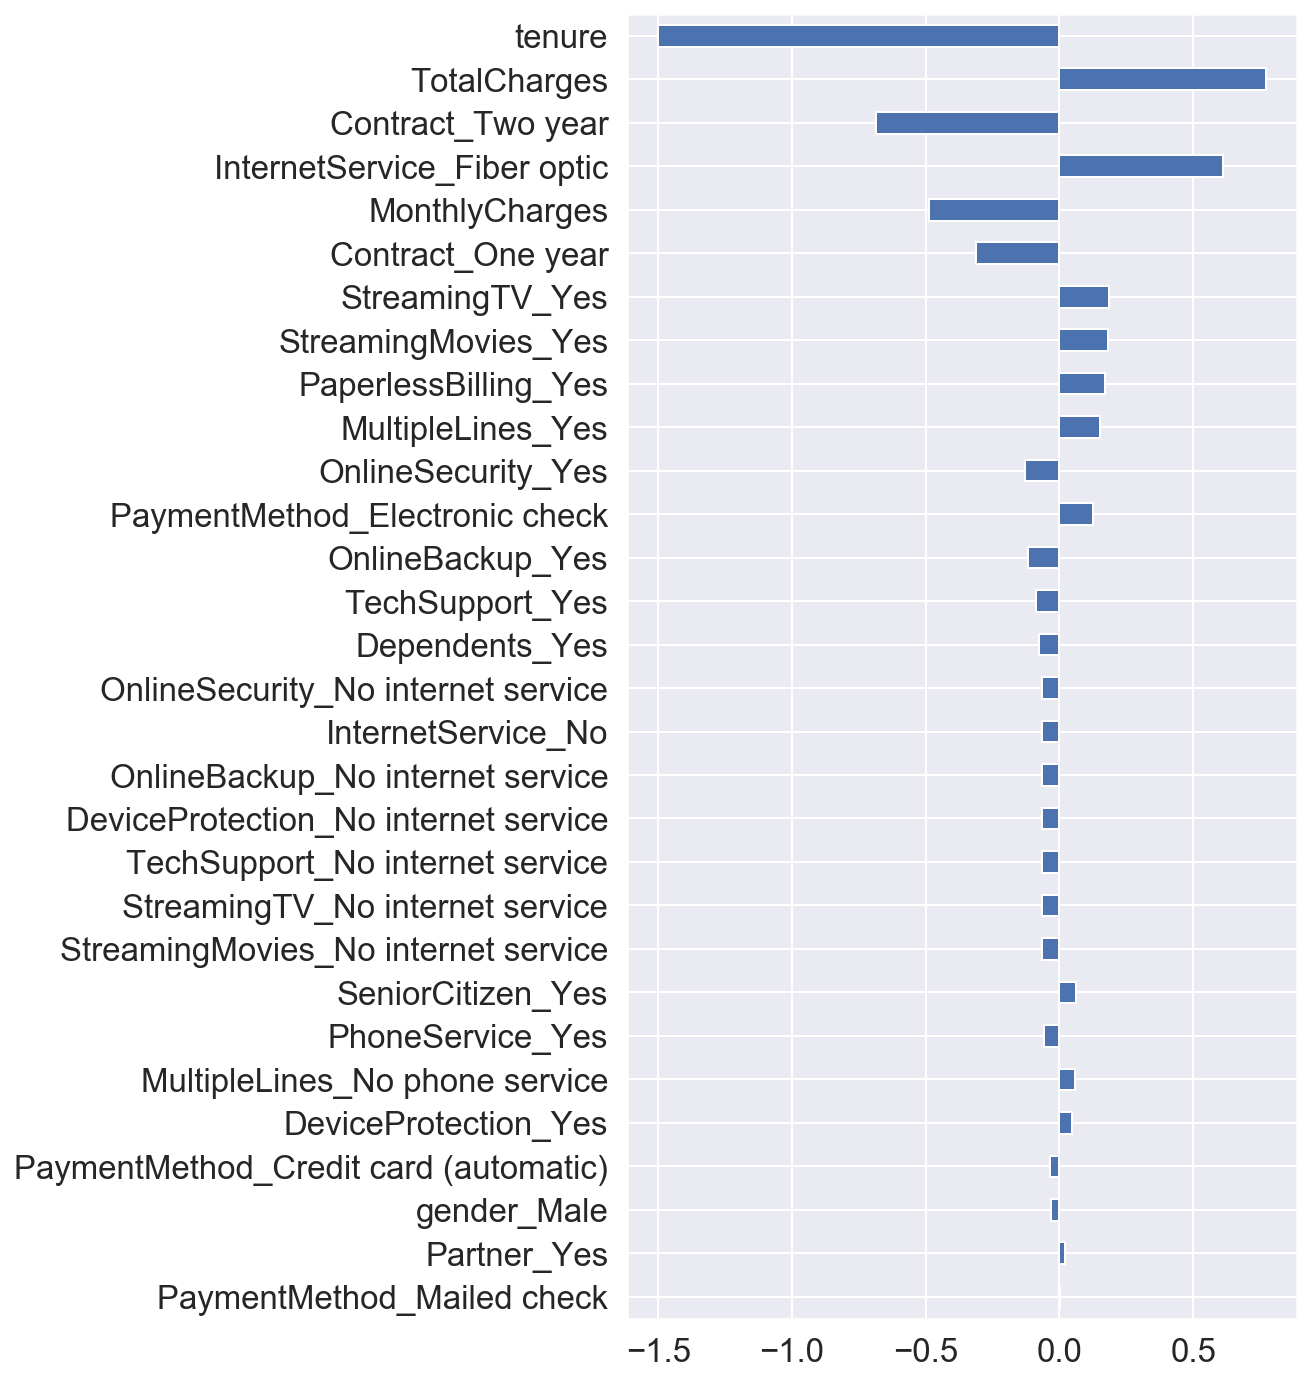

In [31]:
model_coef = pd.DataFrame(model.coef_[0], index = X_train.columns, columns = ['coefficients'])
model_coef['coef_abs'] = model_coef['coefficients'].abs()
model_coef.sort_values(by = 'coef_abs', ascending = True, inplace = True)
model_coef['coefficients'].plot(kind = 'barh', figsize = (6,12));

Evaluation conclusions:
1. Accuracy of 0.81 is 8 basis points ahead of the baseline 0.73.
2. Given class imbalance (roughly 3/4 of customers do not churn, 1/4 of customers churn), precision and recall become more important for evaluation.

Precision: when each class was predicted, how good were the predictions?

Recall: how well was each class predicted?

In both cases, the 'churn' class = 1 had poorer scores than the 'not churn' class. The combined F1 score for the 'churn' class of 0.61 suggests there is room for improvement in the modelling approach.

3. Even in this basic model, it suggests that key features are around tenure (the longer the tenure the less likely the customer will churn), total and monthly charges (which look like there is some colinearity effect), if on a one or two year contract (vs a rolling month-to-month contract), and also the fibre optic internet service (vs DSL).

A number of next steps can be taken, for example:
1. Employ cross validation to see if any better results from LogisticRegression
2. Evaluate AUC-ROC basis to see how changing threshold would impact false positives / false negatives trade-off
3. Address class imbalance
4. Employ different classification models
5. Segment customers to see if different groups of customers benefit from having different model approach.

### GridSearch for best parameters for logistic regression

In [32]:
list(model.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [33]:
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}
model_gs = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=5,
                        scoring='accuracy',
                        return_train_score=True,
                        n_jobs=-1,
                       verbose = 1)

In [34]:
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'fit_intercept': [True, Fa

In [35]:
model_gs.best_params_

{'C': 5.1794746792312125, 'fit_intercept': True, 'penalty': 'l1'}

In [36]:
model_gs.best_score_

0.8039430894308943

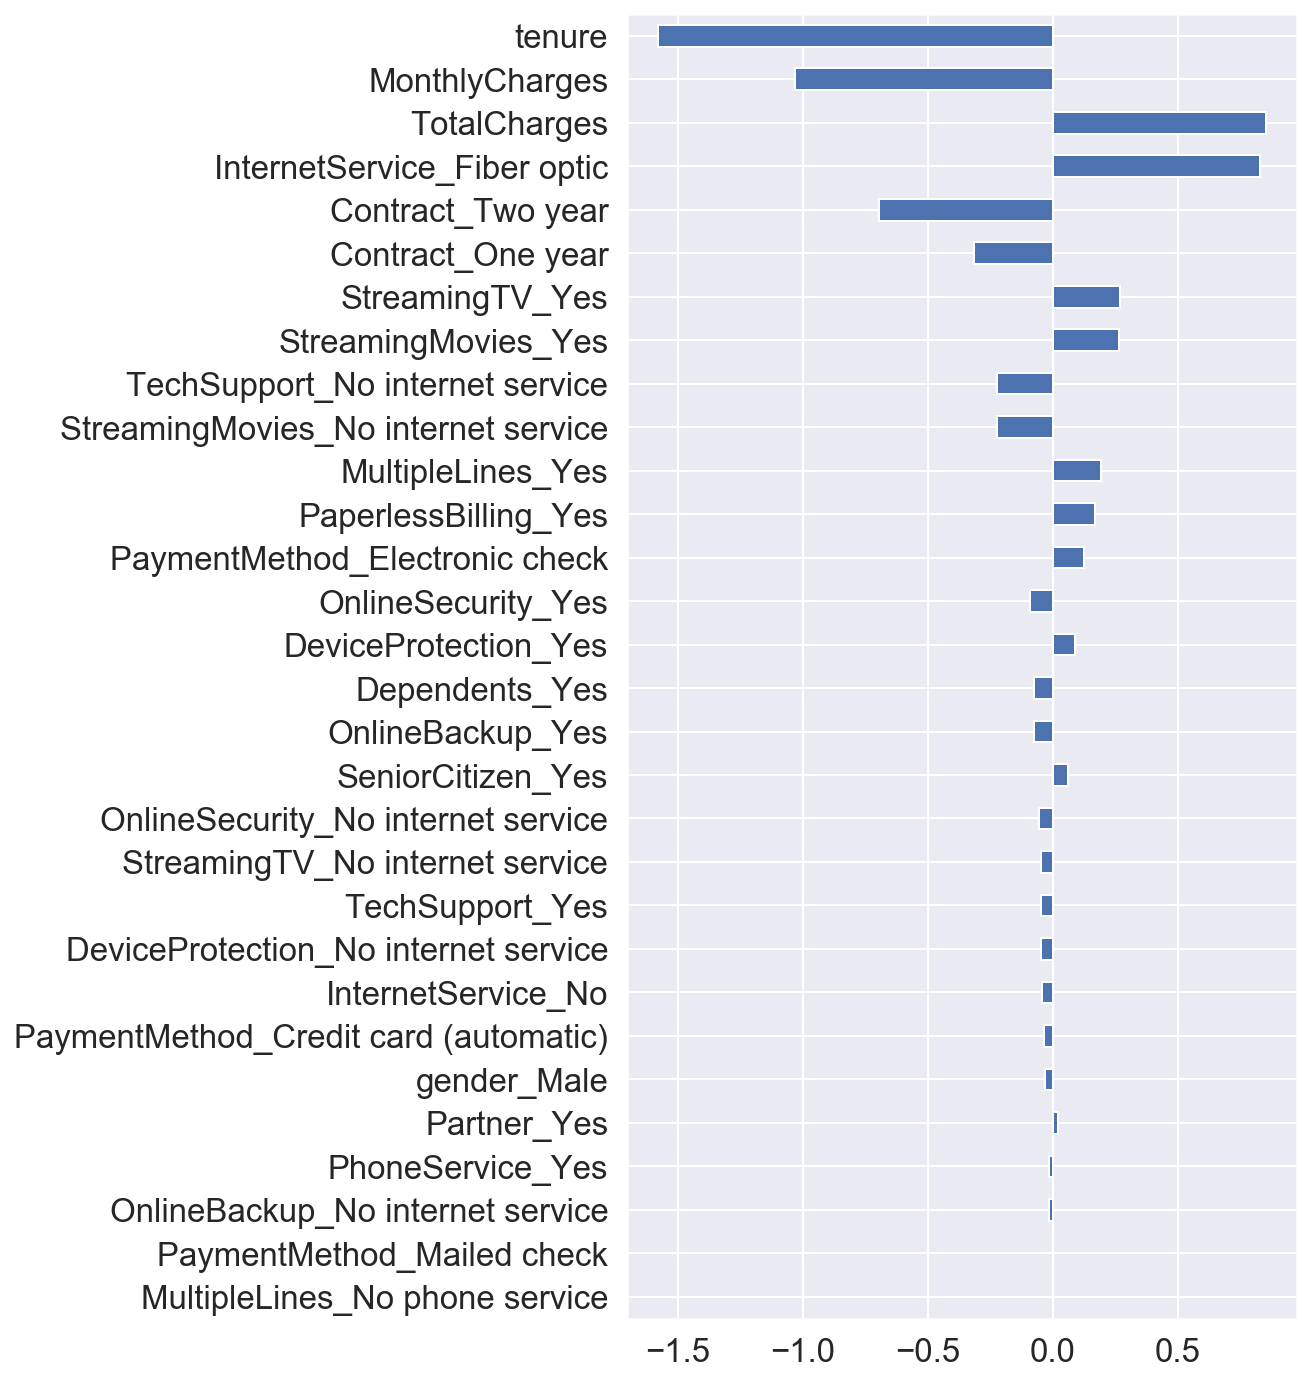

In [37]:
model_gs_coef = pd.DataFrame(model_gs.best_estimator_.coef_[0], index = X_train.columns, columns = ['coefficients'])
model_gs_coef['coef_abs'] = model_gs_coef['coefficients'].abs()
model_gs_coef.sort_values(by = 'coef_abs', ascending = True, inplace = True)
model_gs_coef['coefficients'].plot(kind = 'barh', figsize = (6,12));

Conclusions from grid searching to optimise parameters: no improvement in model results, and in fact slightly behind but not materially enough to make a difference. Similar coefficients for the features. Monthly and total charges do seem to have some colinearity - check correlation between them:

In [38]:
X['MonthlyCharges'].corr(X['TotalCharges'])

0.6510648032262024

Reasonably high correlation. Check TotalCharges and tenure correlation:

In [39]:
X['tenure'].corr(X['TotalCharges'])

0.8258804609332016

Strong correlation between tenure and TotalCharges as well so remove TotalCharges to check impact on scores

In [40]:
X1 = X.drop(columns = ['TotalCharges'])
y1 = y

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, stratify=y, test_size=0.3, random_state=1)

In [42]:
scaler1 = StandardScaler()
X1_train = pd.DataFrame(scaler1.fit_transform(X1_train), columns=X1_train.columns, index=X1_train.index)
X1_test = pd.DataFrame(scaler1.transform(X1_test), columns=X1_test.columns, index=X1_test.index)

In [43]:
model1 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1 = cross_val_score(model1, X1_train, y1_train, cv=5)
cv_score1

array([0.80203046, 0.78781726, 0.79369919, 0.79471545, 0.82825203])

In [44]:
cv_score1.mean()

0.8013028764805414

In [45]:
model1.fit(X1_train, y1_train)
y1hat_test = model1.predict(X1_test)
model1.score(X1_test, y1_test)

0.8033175355450237

In [46]:
conmat1 = np.array(confusion_matrix(y1_test, y1hat_test, labels=[0,1]))
confusion1 = pd.DataFrame(conmat1, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1

pred_not_churn  pred_churn
is_not_churn            1383         166
is_churn                 249         312

In [47]:
print(classification_report(y1_test, y1hat_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.80      0.80      0.80      2110



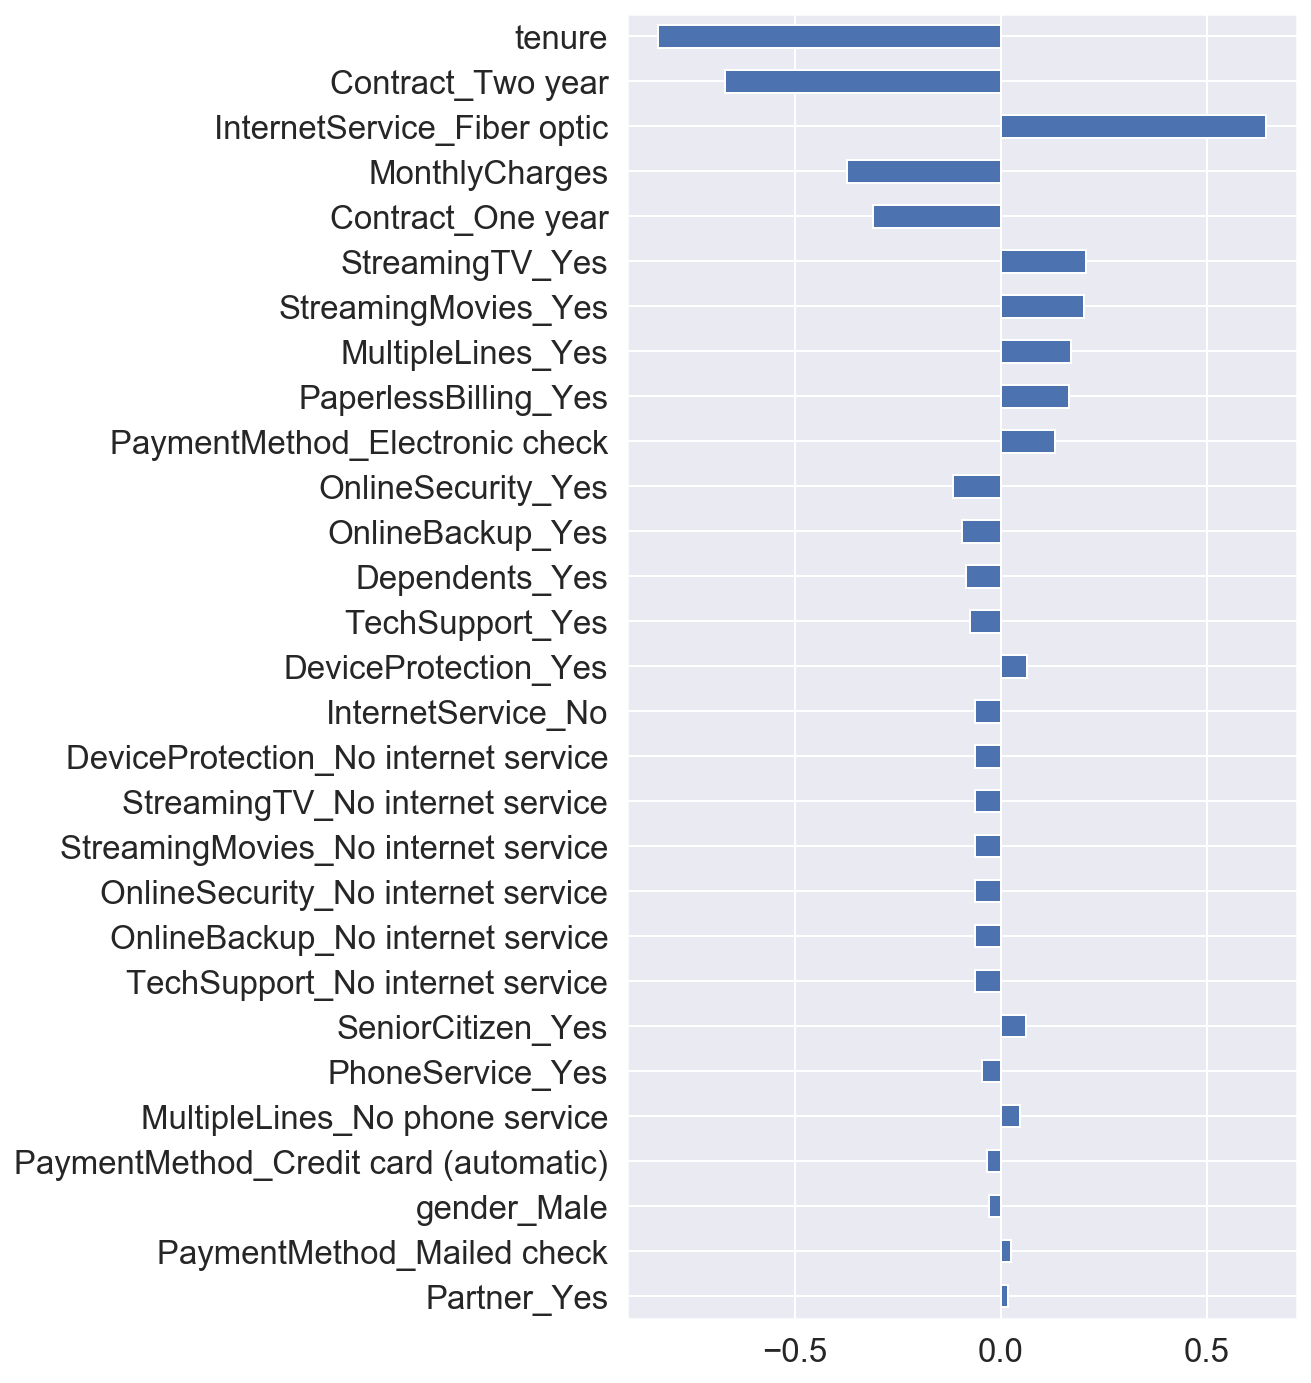

In [48]:
model1_coef = pd.DataFrame(model1.coef_[0], index = X1_train.columns, columns = ['coefficients'])
model1_coef['coef_abs'] = model1_coef['coefficients'].abs()
model1_coef.sort_values(by = 'coef_abs', ascending = True, inplace = True)
model1_coef['coefficients'].plot(kind = 'barh', figsize = (6,12));

Removing the total charges has not reduced model performance, and provides more intuitive coefficients. The biggest cause of customer churn seems to be whether they have Fiber optic internet service or not.

More sophisticated models e.g. Random Forests, may produce better results and will be explored after a discussion of ROC/AUC curves.

### Set up ROC/AUC curves to see how changing threshold can influence results.

In [49]:
confusion1

pred_not_churn  pred_churn
is_not_churn            1383         166
is_churn                 249         312

Currently 249 out of the total 561 'churn' class, or 44%, are being incorrectly predicted.
This compares with 166 out of the total 1549 'not churn' class, or 11%, being incorrectly predicted.

In this business situation, it would be better to predict incorrectly that customers are going to churn than not. I.e. you have two situations:
A: customer is predicted to churn, but actually doesn't
B: customer is predicted not to churn, but does

A is a better output from the model than B, to avoid losing customers. 

Clearly you don't want to over predict churn too much, as then needless measures would be put in place which would result in excess costs of implementation. But with the disparity between the accuracies so much, it looks like you could change the threshold of prediction and improve the model.

In [50]:
# First get the predicted probability vector and explicitly name the columns:
y1_pp = pd.DataFrame(model1.predict_proba(X1_test), columns=[
                    'class_0_pp', 'class_1_pp'])
y1_pp.head(10)

class_0_pp  class_1_pp
0    0.619996    0.380004
1    0.536051    0.463949
2    0.996740    0.003260
3    0.366502    0.633498
4    0.826756    0.173244
5    0.954663    0.045337
6    0.974321    0.025679
7    0.988888    0.011112
8    0.779168    0.220832
9    0.978259    0.021741

In [51]:
y1_pp['pred_class_thresh'] = [1 if x>0.3 else 0 for x in y1_pp.class_1_pp.values]
y1_pp.head(20)

class_0_pp  class_1_pp  pred_class_thresh
0     0.619996    0.380004                  1
1     0.536051    0.463949                  1
2     0.996740    0.003260                  0
3     0.366502    0.633498                  1
4     0.826756    0.173244                  0
5     0.954663    0.045337                  0
6     0.974321    0.025679                  0
7     0.988888    0.011112                  0
8     0.779168    0.220832                  0
9     0.978259    0.021741                  0
10    0.988326    0.011674                  0
11    0.249057    0.750943                  1
12    0.545375    0.454625                  1
13    0.989959    0.010041                  0
14    0.287548    0.712452                  1
15    0.257248    0.742752                  1
16    0.527928    0.472072                  1
17    0.764416    0.235584                  0
18    0.975409    0.024591                  0
19    0.991866    0.008134                  0

In [52]:
conmat1_thresh = np.array(confusion_matrix(y1_test, y1_pp.pred_class_thresh, labels=[0,1]))
confusion1_thresh = pd.DataFrame(conmat1_thresh, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_thresh

pred_not_churn  pred_churn
is_not_churn            1170         379
is_churn                 139         422

In [53]:
print(classification_report(y1_test, y1_pp.pred_class_thresh))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.53      0.75      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.77      2110



Lowering the threshold for predicting churn has equalised the recall between the two classes (the inverse of the % of incorrect predictions above).

As a result, with a a reduced number of incorrect churn predictions, this may produce better business outcome, as fewer customers will be churned.

Note though that the overall accuracy has reduced to 0.75 from 0.83.

The threshold can be optimised based on the cost of preventing churn per customer and the cost of losing a customer because of churn. 

For example, if the cost of preventing churn for each customer is very low, then there is no real loss in implementing measures for a high number of customers. A very low threshold can be set to predict a higher number of churn customers, acknowledging that this will increase the number of incorrect predictions.

On the other hand, if the revenue lost per customer is very low, then there is no point in spending money to implement measures to prevent their churn.

A Receiver Operating Characteristic (ROC) curve can be useful to examine how the recall improves at the expense of false positives.

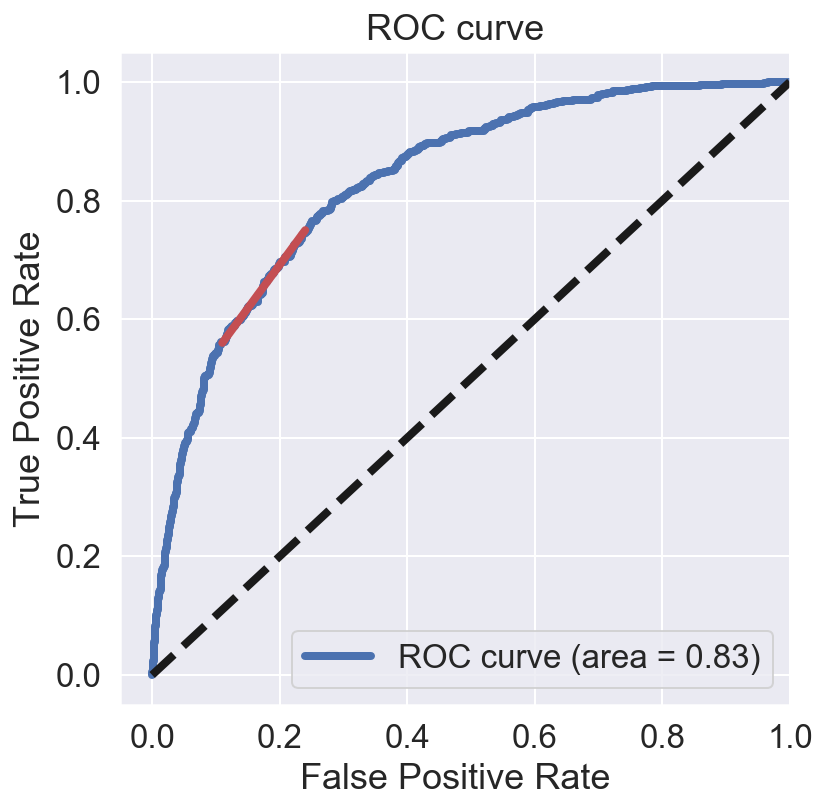

In [54]:
fpr, tpr, threshold = roc_curve(y1_test, y1_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.plot([0.11, 0.24], [0.56, 0.75], 'r', linewidth = 4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Here, the true positive rate (or recall for churn class) of 0.75 gives a false positive rate (or 1 - recall for not churn class) of c.0.25.

This compares with the original threshold of 0.5 which resulted in a true positive rate of 0.56 but a false positive rate of 0.11.

These two results are at either end of the red line in the chart above.

The gradient of this line shows that there is some benefit in adjusting the threshold to this level. Beyond that, as the gradient reduces, the benefit of higher true positive rate slows down vs the increasing false positive rate.

From now on models will be evaluated using the AUC-ROC method to maximise applicability of model. 

Class imbalance will now be addressed.

# Class imbalance

Results so far of only a modest improvement vs the baseline could be explained by the class imbalance in the dataset:

In [55]:
y.value_counts(normalize = True)

0    0.734215
1    0.265785
Name: Churn_Yes, dtype: float64

Various methods can be employed to address class imbalance.

1. Oversample minority class
2. Undersample majority class
3. Generate synthetic samples

First - oversample minority class.

### Oversampling minority class

In [56]:
ros = RandomOverSampler(random_state=1)
X1_train_oversampled, y1_train_oversampled = ros.fit_resample(X1_train, y1_train)
print(sorted(Counter(y1_train_oversampled).items()))

[(0, 3614), (1, 3614)]


In [57]:
cv_score1_roc_auc = cross_val_score(model1, X1_train, y1_train, cv=5, scoring = 'roc_auc', )
print(cv_score1_roc_auc)
cv_score1_roc_auc.mean()

[0.8564347  0.84580258 0.83054853 0.83306042 0.8644536 ]


0.8460599665453907

In [58]:
cv_score1_oversampled_roc_auc = cross_val_score(model1, X1_train_oversampled, y1_train_oversampled, cv=5, scoring = 'roc_auc')
print(cv_score1_oversampled_roc_auc)
cv_score1_oversampled_roc_auc.mean()

[0.84835737 0.85374448 0.85414431 0.85832251 0.85553614]


0.8540209629869757

In [59]:
#Small improvement - fit model and see impact on training precision/recall/AUC
model1.fit(X1_train_oversampled, y1_train_oversampled)
y1_oversampled_hat_test = model1.predict(X1_test)
conmat1_oversampled = np.array(confusion_matrix(y1_test, y1_oversampled_hat_test, labels=[0,1]))
confusion1_oversampled = pd.DataFrame(conmat1_oversampled, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_oversampled

pred_not_churn  pred_churn
is_not_churn            1127         422
is_churn                 122         439

In [60]:
#Reminder of original results:
confusion1

pred_not_churn  pred_churn
is_not_churn            1383         166
is_churn                 249         312

In [61]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_oversampled_hat_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



In [62]:
#Original:
print(classification_report(y1_test, y1hat_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [63]:
y1_oversampled_pp = pd.DataFrame(model1.predict_proba(X1_test), columns=[
                    'class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y1_test, y1_oversampled_pp.class_1_pp)
roc_auc = auc(fpr, tpr)
roc_auc

0.8334225174311758

Mixed results from using oversampling:
1. Cross validation roc_auc scores are slightly higher
2. Test results roc_auc scores are materially in line
3. Overall accuracy reduced
4. Only material improvement in precision / recall is in precision of not churn class 0 and recall of churn class 1.

However, as previously noted, increasing the recall of churn class 1 may be useful from a business outcome perspective as this will result in reduced rate of false negatives of churn class, i.e. reduced number of customers who would churn but predicted by model as not churning.

### Undersampling majority class

In [64]:
rus = RandomUnderSampler(random_state=1)
X1_train_undersampled, y1_train_undersampled = rus.fit_resample(X1_train, y1_train)
print(sorted(Counter(y1_train_undersampled).items()))

[(0, 1308), (1, 1308)]


In [65]:
model1_undersampled = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1_undersampled_roc_auc = cross_val_score(model1_undersampled, X1_train_undersampled, y1_train_undersampled, cv=5, scoring = 'roc_auc')
print(cv_score1_undersampled_roc_auc)
cv_score1_undersampled_roc_auc.mean()

[0.86333838 0.83473721 0.82199994 0.82039133 0.88015852]


0.8441250777792735

In [66]:
model1_undersampled.fit(X1_train_undersampled, y1_train_undersampled)
y1_undersampled_hat_test = model1_undersampled.predict(X1_test)
conmat1_undersampled = np.array(confusion_matrix(y1_test, y1_undersampled_hat_test, labels=[0,1]))
confusion1_undersampled = pd.DataFrame(conmat1_undersampled, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_undersampled

pred_not_churn  pred_churn
is_not_churn            1105         444
is_churn                 118         443

In [67]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_undersampled_hat_test))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



No conclusively better results from using undersampling vs oversampling.

### Synthetic generation of training data - SMOTE

In [68]:
rsmote = SMOTE(random_state=1)
X1_train_SMOTE, y1_train_SMOTE = rsmote.fit_resample(X1_train, y1_train)
print(sorted(Counter(y1_train_SMOTE).items()))

[(0, 3614), (1, 3614)]


In [69]:
model1_SMOTE = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1_SMOTE_roc_auc = cross_val_score(model1_SMOTE, X1_train_SMOTE, y1_train_SMOTE, cv=5, scoring = 'roc_auc')
print(cv_score1_SMOTE_roc_auc)
cv_score1_SMOTE_roc_auc.mean()

[0.84555668 0.85339822 0.87317138 0.85901503 0.85377563]


0.8569833881974903

In [70]:
model1_SMOTE.fit(X1_train_SMOTE, y1_train_SMOTE)
y1_SMOTE_hat_test = model1_SMOTE.predict(X1_test)
conmat1_SMOTE = np.array(confusion_matrix(y1_test, y1_SMOTE_hat_test, labels=[0,1]))
confusion1_SMOTE = pd.DataFrame(conmat1_SMOTE, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_SMOTE

pred_not_churn  pred_churn
is_not_churn            1146         403
is_churn                 134         427

In [71]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_SMOTE_hat_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.51      0.76      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



### Synthetic generation of training data - SMOTETomek

In [72]:
rsmotetomek = SMOTETomek(random_state=1)
X1_train_SMOTETomek, y1_train_SMOTETomek = rsmotetomek.fit_resample(X1_train, y1_train)
print(sorted(Counter(y1_train_SMOTETomek).items()))

[(0, 3448), (1, 3448)]


In [73]:
model1_SMOTETomek = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1_SMOTETomek_roc_auc = cross_val_score(model1_SMOTETomek, X1_train_SMOTETomek, y1_train_SMOTETomek, cv=5, scoring = 'roc_auc')
print(cv_score1_SMOTETomek_roc_auc)
cv_score1_SMOTETomek_roc_auc.mean()

[0.85902962 0.87631728 0.88573652 0.86964725 0.86503018]


0.8711521716266875

In [74]:
model1_SMOTETomek.fit(X1_train_SMOTETomek, y1_train_SMOTETomek)
y1_SMOTETomek_hat_test = model1_SMOTETomek.predict(X1_test)
conmat1_SMOTETomek = np.array(confusion_matrix(y1_test, y1_SMOTETomek_hat_test, labels=[0,1]))
confusion1_SMOTETomek = pd.DataFrame(conmat1_SMOTETomek, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_SMOTETomek

pred_not_churn  pred_churn
is_not_churn            1141         408
is_churn                 133         428

In [75]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_SMOTETomek_hat_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.51      0.76      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.74      0.76      2110



Cross validation scores are highest for SMOTETomek method of generating balanced training data. Results in higher recall scores for churn class and therefore will use this as base dataset for future modelling.

# Random Forests modelling

In [76]:
model_RF = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth=3)
cv_score_RF = cross_val_score(model_RF, X1_train_SMOTETomek, y1_train_SMOTETomek, cv = 5, scoring='roc_auc')
print(cv_score_RF)
cv_score_RF.mean()

[0.85849611 0.87541175 0.89249595 0.87833554 0.87009844]


0.8749675596563637

In [77]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [78]:
model_RF4gs = RandomForestClassifier(random_state = 1)
params_RFC = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800],
              'max_depth' : np.linspace(1,50,50)}
model_RF_gs = GridSearchCV(estimator = model_RF4gs,
                          param_grid = params_RFC,
                          cv=5,
                          n_jobs=-1,
                          verbose = 1,
                          scoring='roc_auc')

In [79]:
model_RF_gs.fit(X1_train_SMOTETomek, y1_train_SMOTETomek)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 14.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
 

In [80]:
model_RF_gs.best_params_

{'max_depth': 20.0, 'n_estimators': 600}

Best parameters within range (i.e. not min or max of range) hence best results possible.

In [81]:
model_RF_gs.best_score_

0.9513728894266398

In [82]:
#Check that using synthetic dataset improves results for this model too:
model_RF4gs_original = RandomForestClassifier(random_state = 1)
params_RFC = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800],
              'max_depth' : np.linspace(1,30,30)}
model_RF_gs_original = GridSearchCV(estimator = model_RF4gs_original,
                          param_grid = params_RFC,
                          cv=5,
                          n_jobs=-1,
                          verbose = 1,
                          scoring='roc_auc')
model_RF_gs_original.fit(X1_train, y1_train)
print(model_RF_gs_original.best_params_)
model_RF_gs_original.best_score_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  6.0min finished


{'max_depth': 7.0, 'n_estimators': 600}


0.8463382693771664

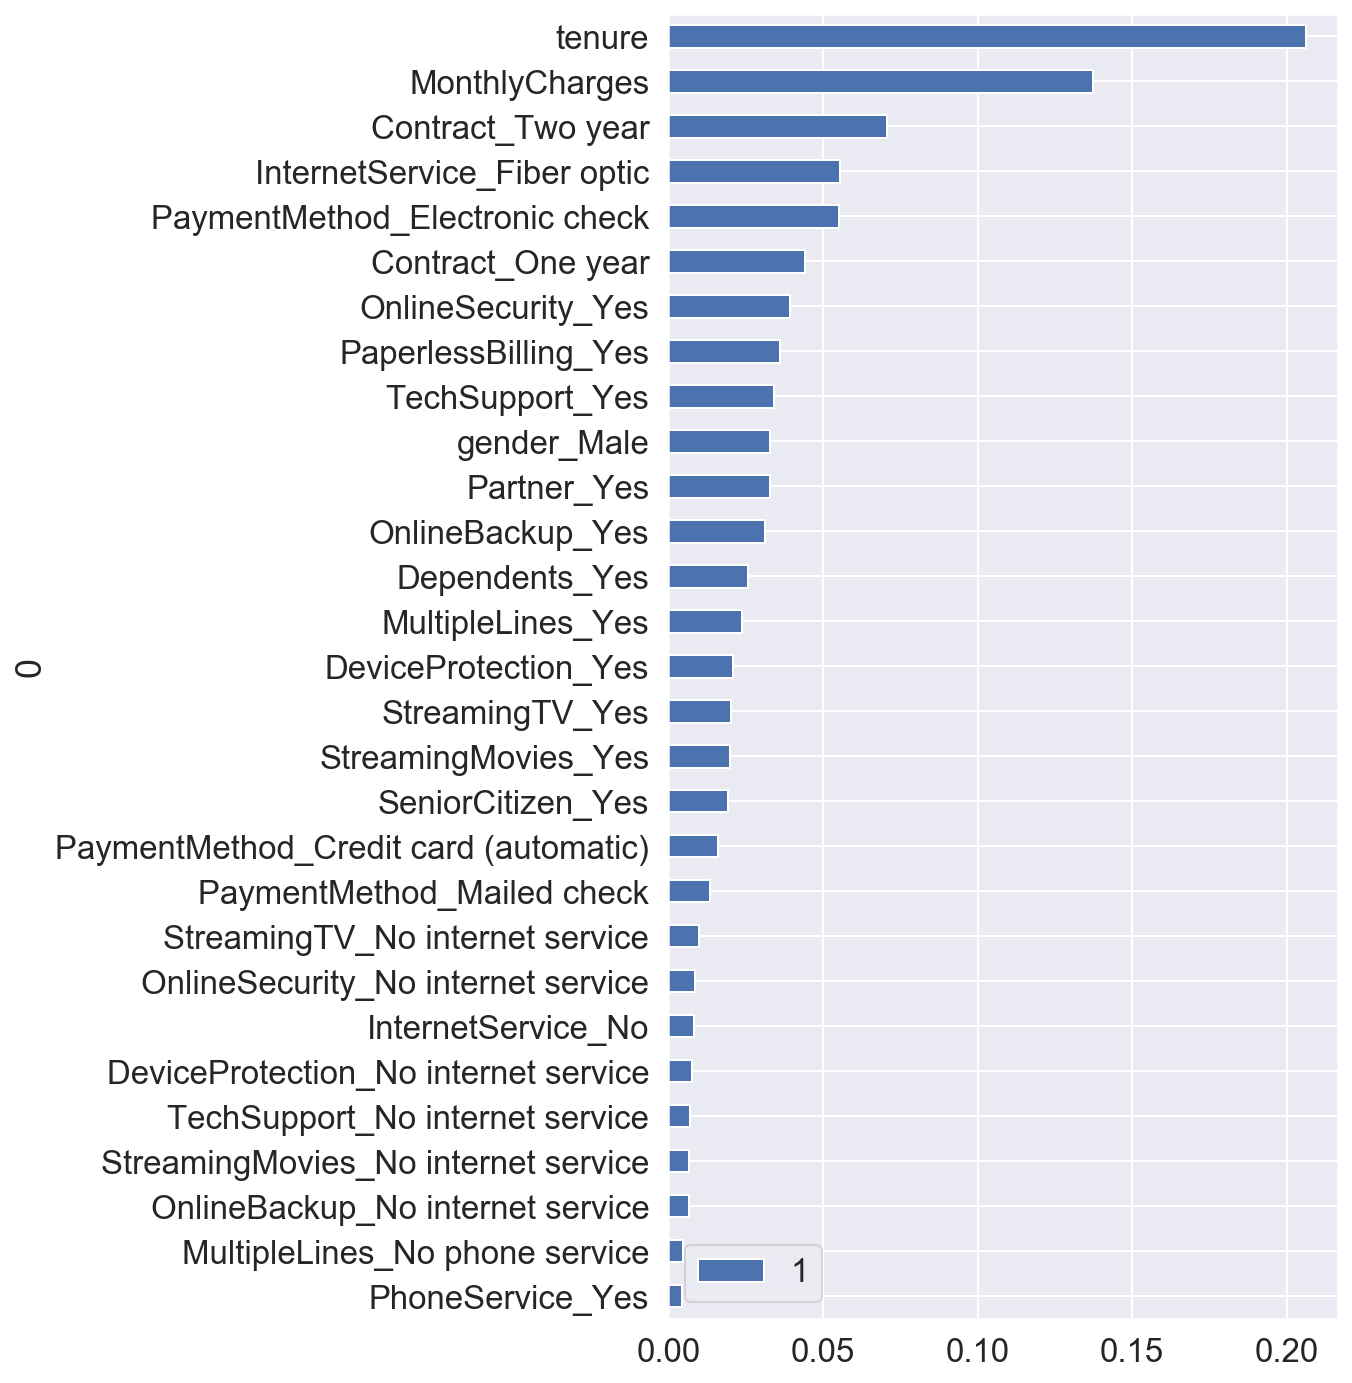

In [83]:
pd.DataFrame(list(zip(X1_train.columns,model_RF_gs.best_estimator_.feature_importances_))).sort_values(by=1,ascending=True).plot(kind='barh',
    x=0,y=1, figsize = (6,12))
plt.show()

Better results than logistic regression modelling, especially when using the SMOTETomek class balancing technique. Roc-auc score of 0.95 vs 0.86 for logistic regression. Let's look at what this means for precision / recall on the test dataset:

In [84]:
best_model_RFC = model_RF_gs.best_estimator_
y1_hat_test_best_model_RFC = best_model_RFC.predict(X1_test)
conmat1_best_model_RFC = np.array(confusion_matrix(y1_test, y1_hat_test_best_model_RFC, labels=[0,1]))
confusion1_best_model_RFC = pd.DataFrame(conmat1_best_model_RFC, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_best_model_RFC

pred_not_churn  pred_churn
is_not_churn            1323         226
is_churn                 218         343

In [85]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_hat_test_best_model_RFC))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1549
           1       0.60      0.61      0.61       561

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [86]:
#Compare precision / recall metrics vs original logistic regression model:
print(classification_report(y1_test, y1hat_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.80      0.80      0.80      2110



On the test dataset, the model appears to be performing worse than the training dataset:

In [87]:
y1_best_model_RFC_pp = pd.DataFrame(best_model_RFC.predict_proba(X1_test), columns=[
                    'class_0_pp', 'class_1_pp'])
roc_auc_score(y1_test, y1_best_model_RFC_pp.class_1_pp)

0.8227123703522139

In [88]:
y1_best_model_RFC_pp_train = pd.DataFrame(best_model_RFC.predict_proba(X1_train_SMOTETomek), columns=[
                    'class_0_pp', 'class_1_pp'])
model_RF_gs.best_score_

0.9513728894266398

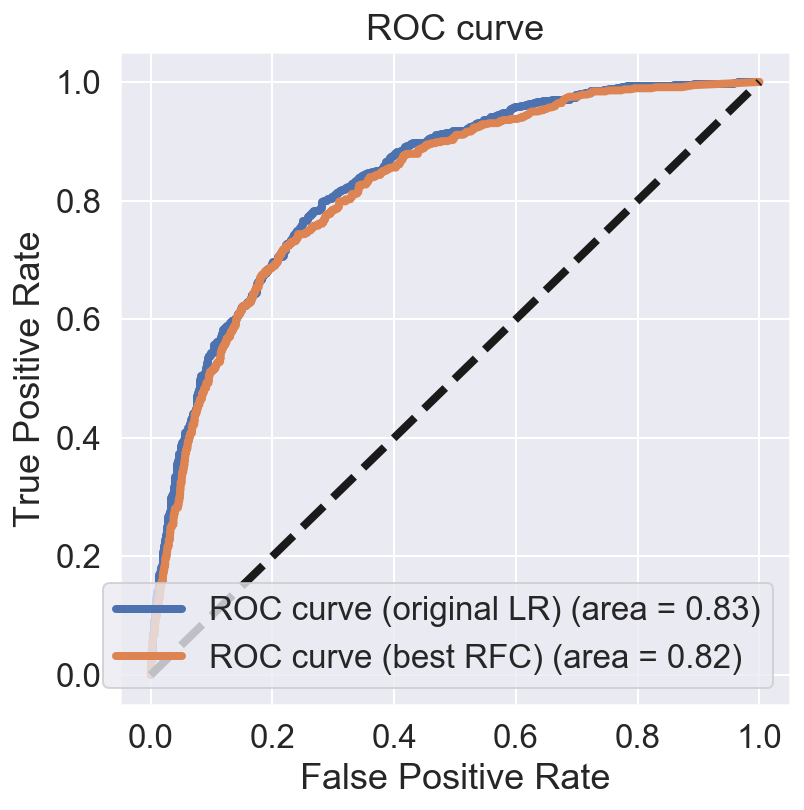

In [89]:
fpr_LR, tpr_LR, threshold_LR = roc_curve(y1_test, y1_pp.class_1_pp)
roc_auc_LR = auc(fpr_LR, tpr_LR)

fpr_best_model_RFC, tpr_best_model_RFC, threshold_best_model_RFC = roc_curve(y1_test,
                                                                            y1_best_model_RFC_pp.class_1_pp)
roc_auc_best_model_RFC = auc(fpr_best_model_RFC, tpr_best_model_RFC)

# Plot of a ROC curve for class 1
plt.figure(figsize=[6, 6])
plt.plot(fpr_LR, tpr_LR, label='ROC curve (original LR) (area = %0.2f)' % roc_auc_LR, linewidth=4)
plt.plot(fpr_best_model_RFC, tpr_best_model_RFC, 
         label = 'ROC curve (best RFC) (area = %0.2f)' % roc_auc_best_model_RFC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Random Forest Classifier, while promising on the cross-validation ROC_AUC scores, fails to generalise the high cross-validation scores, with test results in line with logistic regression model. Move on to next algorithm.

# Support Vector Machines

Use default values for each kernel type to identify candidates for further investigation.

In [90]:
model_SVM = svm.SVC(kernel = 'rbf')
cross_val_score(model_SVM, X1_train_SMOTETomek, y1_train_SMOTETomek, cv = 5, scoring = 'roc_auc')

array([0.86951901, 0.90637765, 0.93826171, 0.92439999, 0.91428031])

In [91]:
model_SVM = svm.SVC(kernel = 'linear')
cross_val_score(model_SVM, X1_train_SMOTETomek, y1_train_SMOTETomek, cv = 5, scoring = 'roc_auc')

array([0.85880487, 0.87674218, 0.88502556, 0.86545718, 0.85970846])

In [92]:
model_SVM = svm.SVC(kernel = 'poly')
cross_val_score(model_SVM, X1_train_SMOTETomek, y1_train_SMOTETomek, cv = 5, scoring = 'roc_auc')

array([0.86934258, 0.89674597, 0.90545003, 0.89392735, 0.88727204])

In [93]:
model_SVM = svm.SVC(kernel = 'sigmoid')
cross_val_score(model_SVM, X1_train_SMOTETomek, y1_train_SMOTETomek, cv = 5, scoring = 'roc_auc')

array([0.735251  , 0.74971709, 0.73243095, 0.73256978, 0.71726299])

Radial basis looks like the best performing. First proceed to evaluation to see if improvement generalises to test dataset.

In [94]:
model_SVM = svm.SVC(kernel = 'rbf', probability=True)
model_SVM.fit(X1_train_SMOTETomek, y1_train_SMOTETomek)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
y1_model_SVM_pp = pd.DataFrame(model_SVM.predict_proba(X1_test), columns=[
                    'class_0_pp', 'class_1_pp'])
roc_auc_score(y1_test, y1_model_SVM_pp.class_1_pp)

0.8209148792447314

In [96]:
y1_hat_test_model_SVM = model_SVM.predict(X1_test)
conmat1_model_SVM = np.array(confusion_matrix(y1_test, y1_hat_test_model_SVM, labels=[0,1]))
confusion1_model_SVM = pd.DataFrame(conmat1_model_SVM, index = ['is_not_churn', 'is_churn'], 
                         columns = ['pred_not_churn', 'pred_churn'])
confusion1_model_SVM

pred_not_churn  pred_churn
is_not_churn            1170         379
is_churn                 149         412

In [97]:
#Compare precision / recall metrics:
print(classification_report(y1_test, y1_hat_test_model_SVM))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.52      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



No material improvement on test data. Try using original dataset (rather than training set revised for class imbalance).

In [98]:
model_SVM_original = svm.SVC(kernel = 'rbf', probability=True)
model_SVM_original.fit(X1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
y1_model_SVM_pp_original = pd.DataFrame(model_SVM_original.predict_proba(X1_test), columns=[
                    'class_0_pp', 'class_1_pp'])
roc_auc_score(y1_test, y1_model_SVM_pp_original.class_1_pp)

0.7901308301946284

There doesn't seem to be a material benefit in trying different algorithms to model when customers would churn. Let's look at some population statistics to see if there are any customer groupings which may require different models.

# Customer groupings

## Manual groupings

Given that all the model approaches showed that the tenure was the most important characteristic for predicting churn, let's look at this feature in more detail:

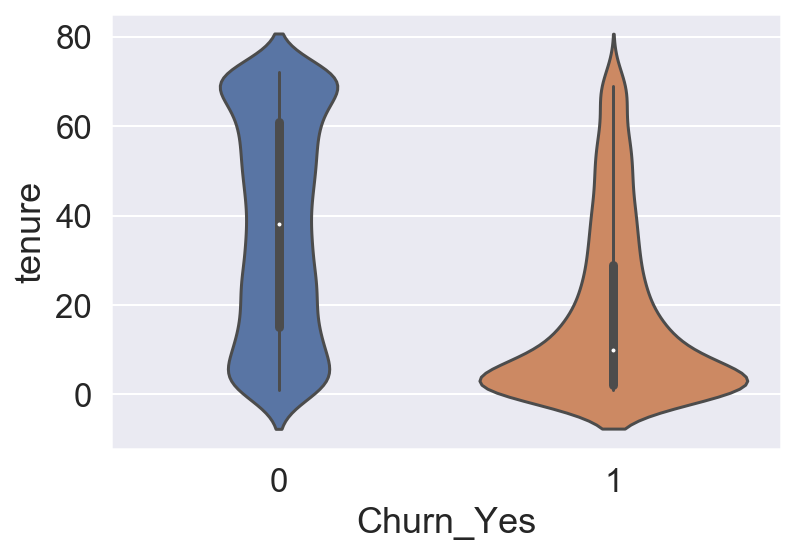

In [100]:
ax = sns.violinplot(x = 'Churn_Yes', 
                    y = 'tenure',
                    data = data_dum)

In [101]:
data_dum[data_dum['Churn_Yes']==1]['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [102]:
data_dum[data_dum['Churn_Yes']==0]['tenure'].describe()

count    5163.00000
mean       37.65001
std        24.07694
min         1.00000
25%        15.00000
50%        38.00000
75%        61.00000
max        72.00000
Name: tenure, dtype: float64

In [103]:
data_dum[data_dum['Churn_Yes']==1]['tenure'].value_counts(normalize=True)[0:10]

1     0.203317
2     0.065811
3     0.050294
4     0.044409
5     0.034243
7     0.027287
9     0.024612
10    0.024077
8     0.022472
6     0.021402
Name: tenure, dtype: float64

This shows that 25% of the churn class has tenure less than or equal to 2 months, whereas equivalent quartile for the not churn class is 15 months. In fact, 20% of the churn class has tenure of 1 month. So let's try splitting the data set into one set with tenure = 1 month and another set with tenure > 1.

In [104]:
data_dum_short = data_dum[data_dum['tenure']==1].copy()
data_dum_long = data_dum[data_dum['tenure']>1].copy()

In [105]:
print(data_dum.shape)
print(data_dum_short.shape)
print(data_dum_long.shape)

(7032, 31)
(613, 31)
(6419, 31)


In [106]:
X_short = data_dum_short.copy()
y_short = X_short.pop('Churn_Yes')

In [107]:
X1_short = X_short.drop(columns = 'TotalCharges')
y1_short = y_short

In [108]:
X1_short_train, X1_short_test, y1_short_train, y1_short_test \
= train_test_split(X1_short, y1_short, stratify=y1_short, test_size=0.3, random_state=1)

In [109]:
#Baseline score
y1_short_test.value_counts(normalize = True)

1    0.619565
0    0.380435
Name: Churn_Yes, dtype: float64

In [110]:
scaler1_short = StandardScaler()
X1_short_train = pd.DataFrame(scaler1_short.fit_transform(X1_short_train), columns=X1_short_train.columns, index=X1_short_train.index)
X1_short_test = pd.DataFrame(scaler1_short.transform(X1_short_test), columns=X1_short_test.columns, index=X1_short_test.index)

In [111]:
model1_short = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1_short = cross_val_score(model1_short, X1_short_train, y1_short_train, cv=5)
cv_score1_short

array([0.76744186, 0.75581395, 0.62790698, 0.61627907, 0.78823529])

In [112]:
cv_score1_short.mean()

0.7111354309165527

In [113]:
model1_short.fit(X1_short_train, y1_short_train)
y1_short_hat_test = model1.predict(X1_short_test)
model1_short.score(X1_short_test, y1_short_test)

0.6956521739130435

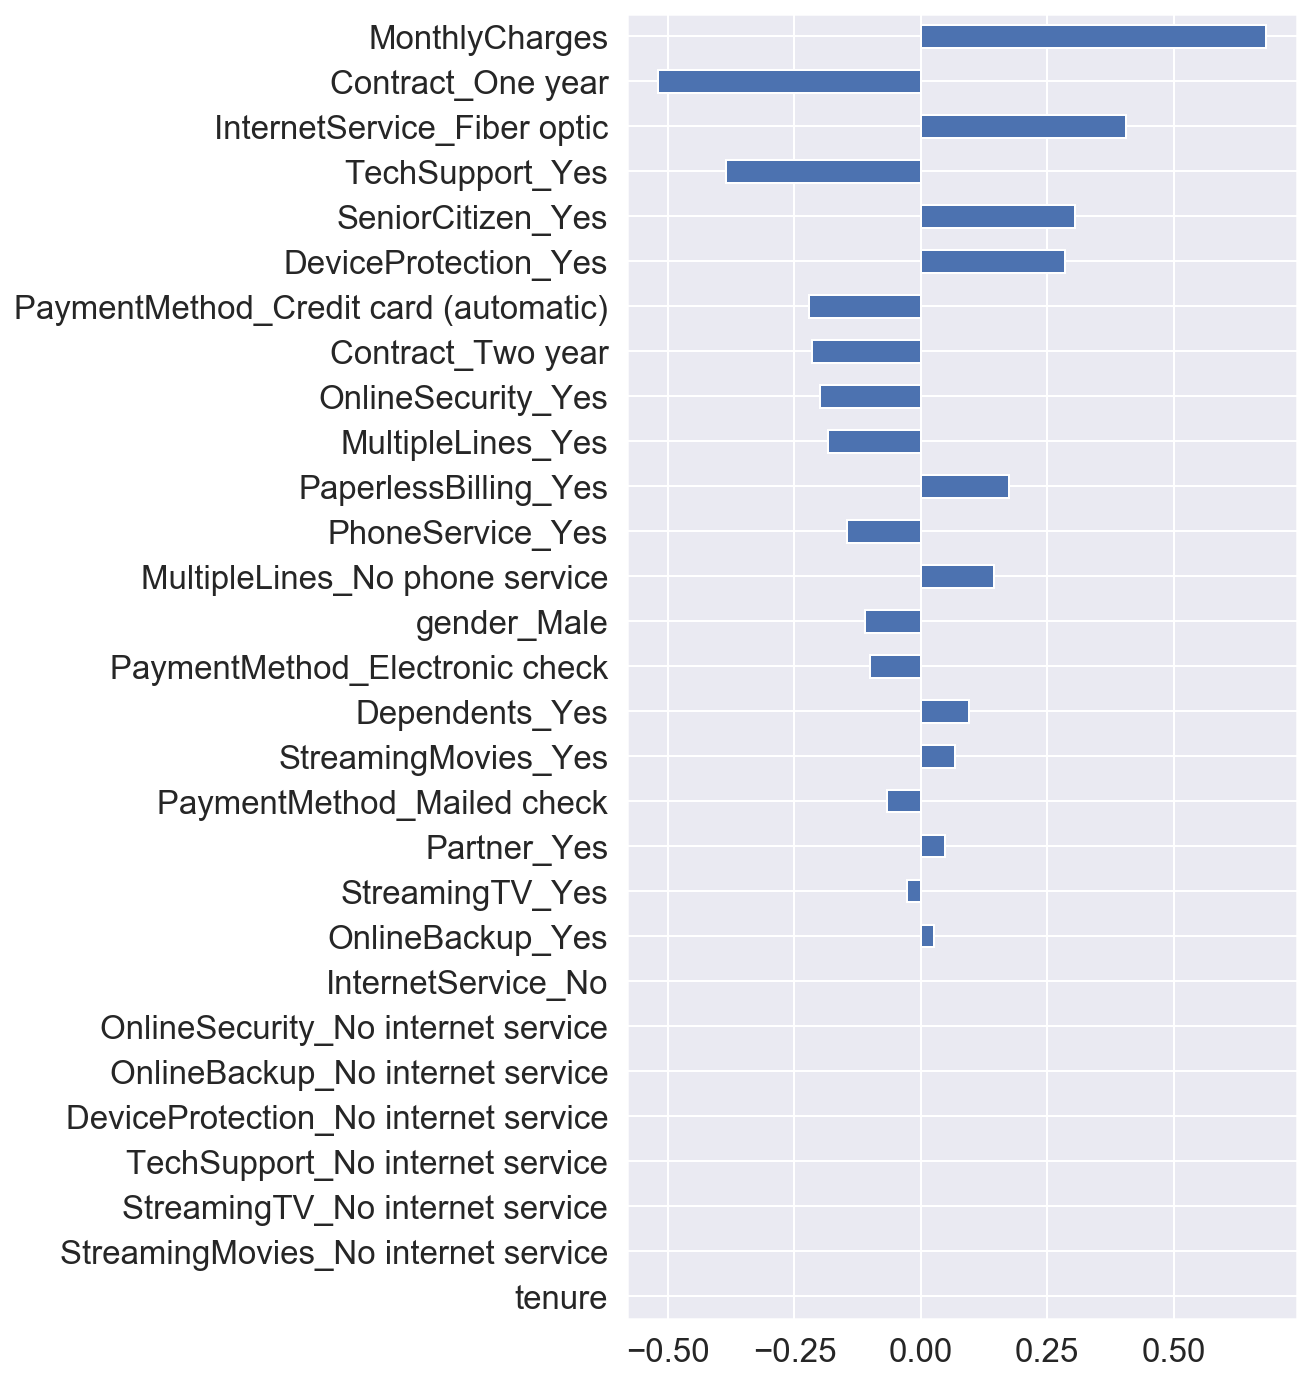

In [114]:
model1_short_coef = pd.DataFrame(model1_short.coef_[0], index = X1_short_train.columns, columns = ['coefficients'])
model1_short_coef['coef_abs'] = model1_short_coef['coefficients'].abs()
model1_short_coef.sort_values(by = 'coef_abs', ascending = True, inplace = True)
model1_short_coef['coefficients'].plot(kind = 'barh', figsize = (6,12));

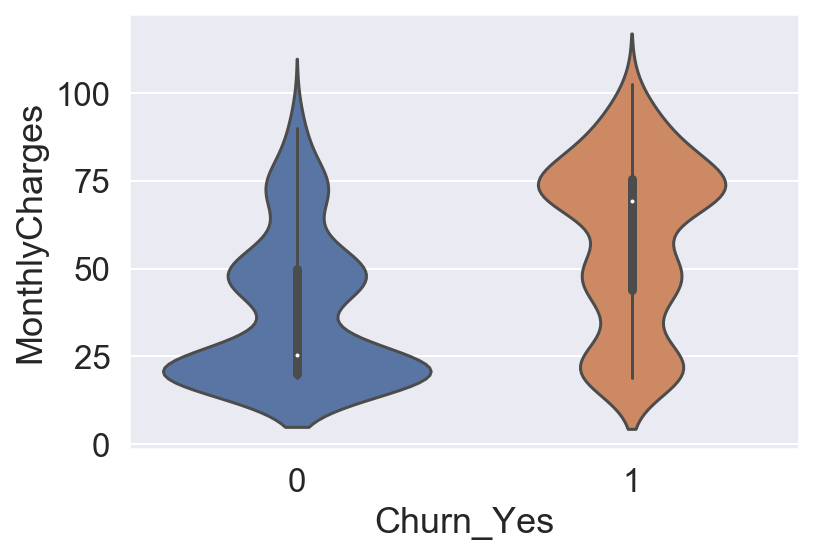

In [115]:
ax = sns.violinplot(x = 'Churn_Yes', 
                    y = 'MonthlyCharges',
                    data = data_dum_short)

In [116]:
one_year_contract_mask = data_dum_short['Contract_One year'] == 1
two_year_contract_mask = data_dum_short['Contract_Two year'] == 1
churn_mask = data_dum_short['Churn_Yes']==1
data_dum_short[(one_year_contract_mask | two_year_contract_mask)].count()

tenure                                   9
MonthlyCharges                           9
TotalCharges                             9
gender_Male                              9
SeniorCitizen_Yes                        9
Partner_Yes                              9
Dependents_Yes                           9
PhoneService_Yes                         9
MultipleLines_No phone service           9
MultipleLines_Yes                        9
InternetService_Fiber optic              9
InternetService_No                       9
OnlineSecurity_No internet service       9
OnlineSecurity_Yes                       9
OnlineBackup_No internet service         9
OnlineBackup_Yes                         9
DeviceProtection_No internet service     9
DeviceProtection_Yes                     9
TechSupport_No internet service          9
TechSupport_Yes                          9
StreamingTV_No internet service          9
StreamingTV_Yes                          9
StreamingMovies_No internet service      9
StreamingMo

It should not be possible to churn in first month for people in 1 or 2 year contracts, so remove those rows from dataset as do not add any value.

In [117]:
data_dum_short_1 = data_dum_short.drop(index = data_dum_short[(one_year_contract_mask | two_year_contract_mask)].index)

In [118]:
data_dum_short_1.shape

(604, 31)

In [119]:
X_short_1 = data_dum_short_1.copy()
X1_short_1 = X_short_1.drop(columns = 'TotalCharges')
y1_short_1 = X1_short_1.pop('Churn_Yes')

In [120]:
X1_short_1_train, X1_short_1_test, y1_short_1_train, y1_short_1_test \
= train_test_split(X1_short_1, y1_short_1, stratify=y1_short_1, test_size=0.3, random_state=1)

In [121]:
#Baseline score
y1_short_1_test.value_counts(normalize = True)

1    0.631868
0    0.368132
Name: Churn_Yes, dtype: float64

In [122]:
scaler1_short_1 = StandardScaler()
X1_short_1_train = pd.DataFrame(scaler1_short_1.fit_transform(X1_short_1_train), columns=X1_short_1_train.columns, index=X1_short_1_train.index)
X1_short_1_test = pd.DataFrame(scaler1_short_1.transform(X1_short_1_test), columns=X1_short_1_test.columns, index=X1_short_1_test.index)

In [123]:
model1_short_1 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
cv_score1_short_1 = cross_val_score(model1_short_1, X1_short_1_train, y1_short_1_train, cv=5)
cv_score1_short_1

array([0.65882353, 0.74117647, 0.66666667, 0.80952381, 0.71428571])

In [124]:
model1_short_1.fit(X1_short_1_train, y1_short_1_train)
y1_short_1_hat_test = model1_short_1.predict(X1_short_1_test)
model1_short_1.score(X1_short_1_test, y1_short_1_test)

0.6648351648351648

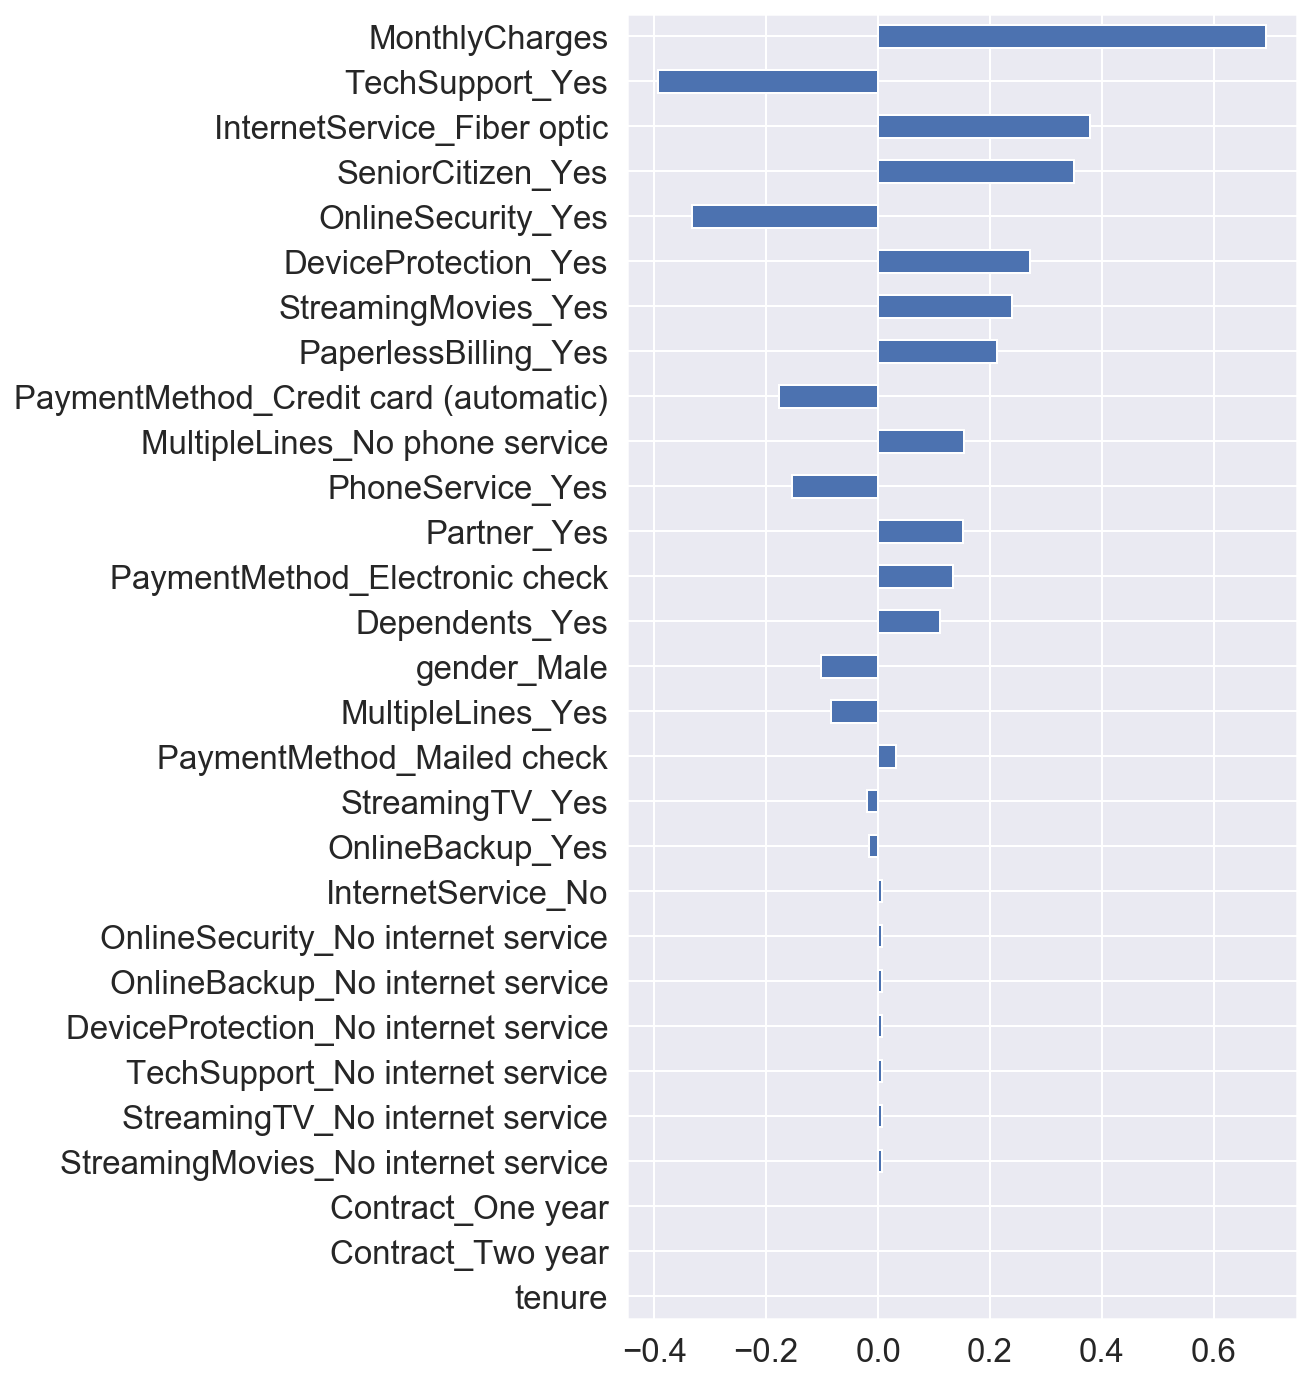

In [125]:
model1_short_1_coef = pd.DataFrame(model1_short_1.coef_[0], index = X1_short_1_train.columns, columns = ['coefficients'])
model1_short_1_coef['coef_abs'] = model1_short_1_coef['coefficients'].abs()
model1_short_1_coef.sort_values(by = 'coef_abs', ascending = True, inplace = True)
model1_short_1_coef['coefficients'].plot(kind = 'barh', figsize = (6,12));

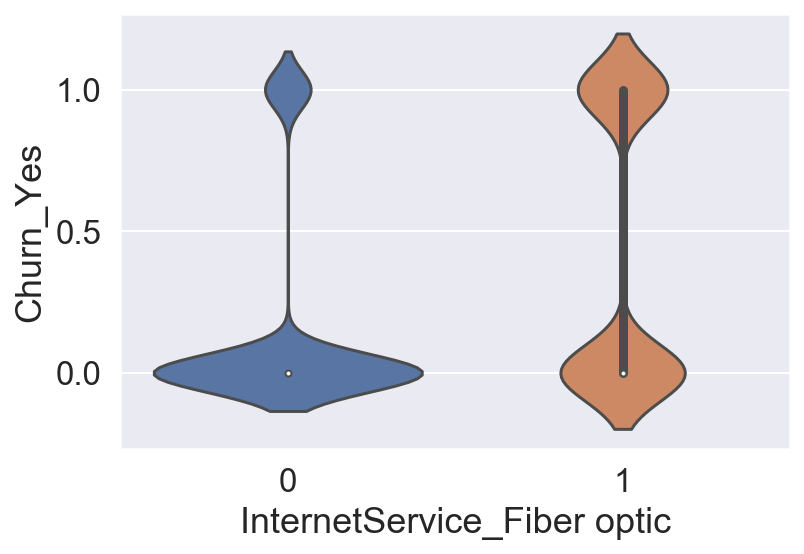

In [126]:
ax = sns.violinplot(x = 'InternetService_Fiber optic', 
                    y = 'Churn_Yes',
                    data = data_dum)

Now try some clustering methods to see how successful they are on this dataset.

## Clustering methods

### K-means clustering

In [127]:
scaler_clustering = StandardScaler()
X1_std = pd.DataFrame(scaler_clustering.fit_transform(X1), columns = X1.columns, index = X1.index)

In [128]:
model_Kmeans = KMeans(n_clusters = 3, random_state = 0)
model_Kmeans.fit(X1_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [129]:
cluster_labels = model_Kmeans.labels_

In [130]:
Counter(cluster_labels)

Counter({2: 680, 1: 4832, 0: 1520})

In [131]:
X1_std_Kmeans = X1_std.copy()
X1_std_Kmeans['labels'] = cluster_labels

In [132]:
X1_std_Kmeans.columns

Index(['tenure', 'MonthlyCharges', 'gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'labels'],
      dtype='object')

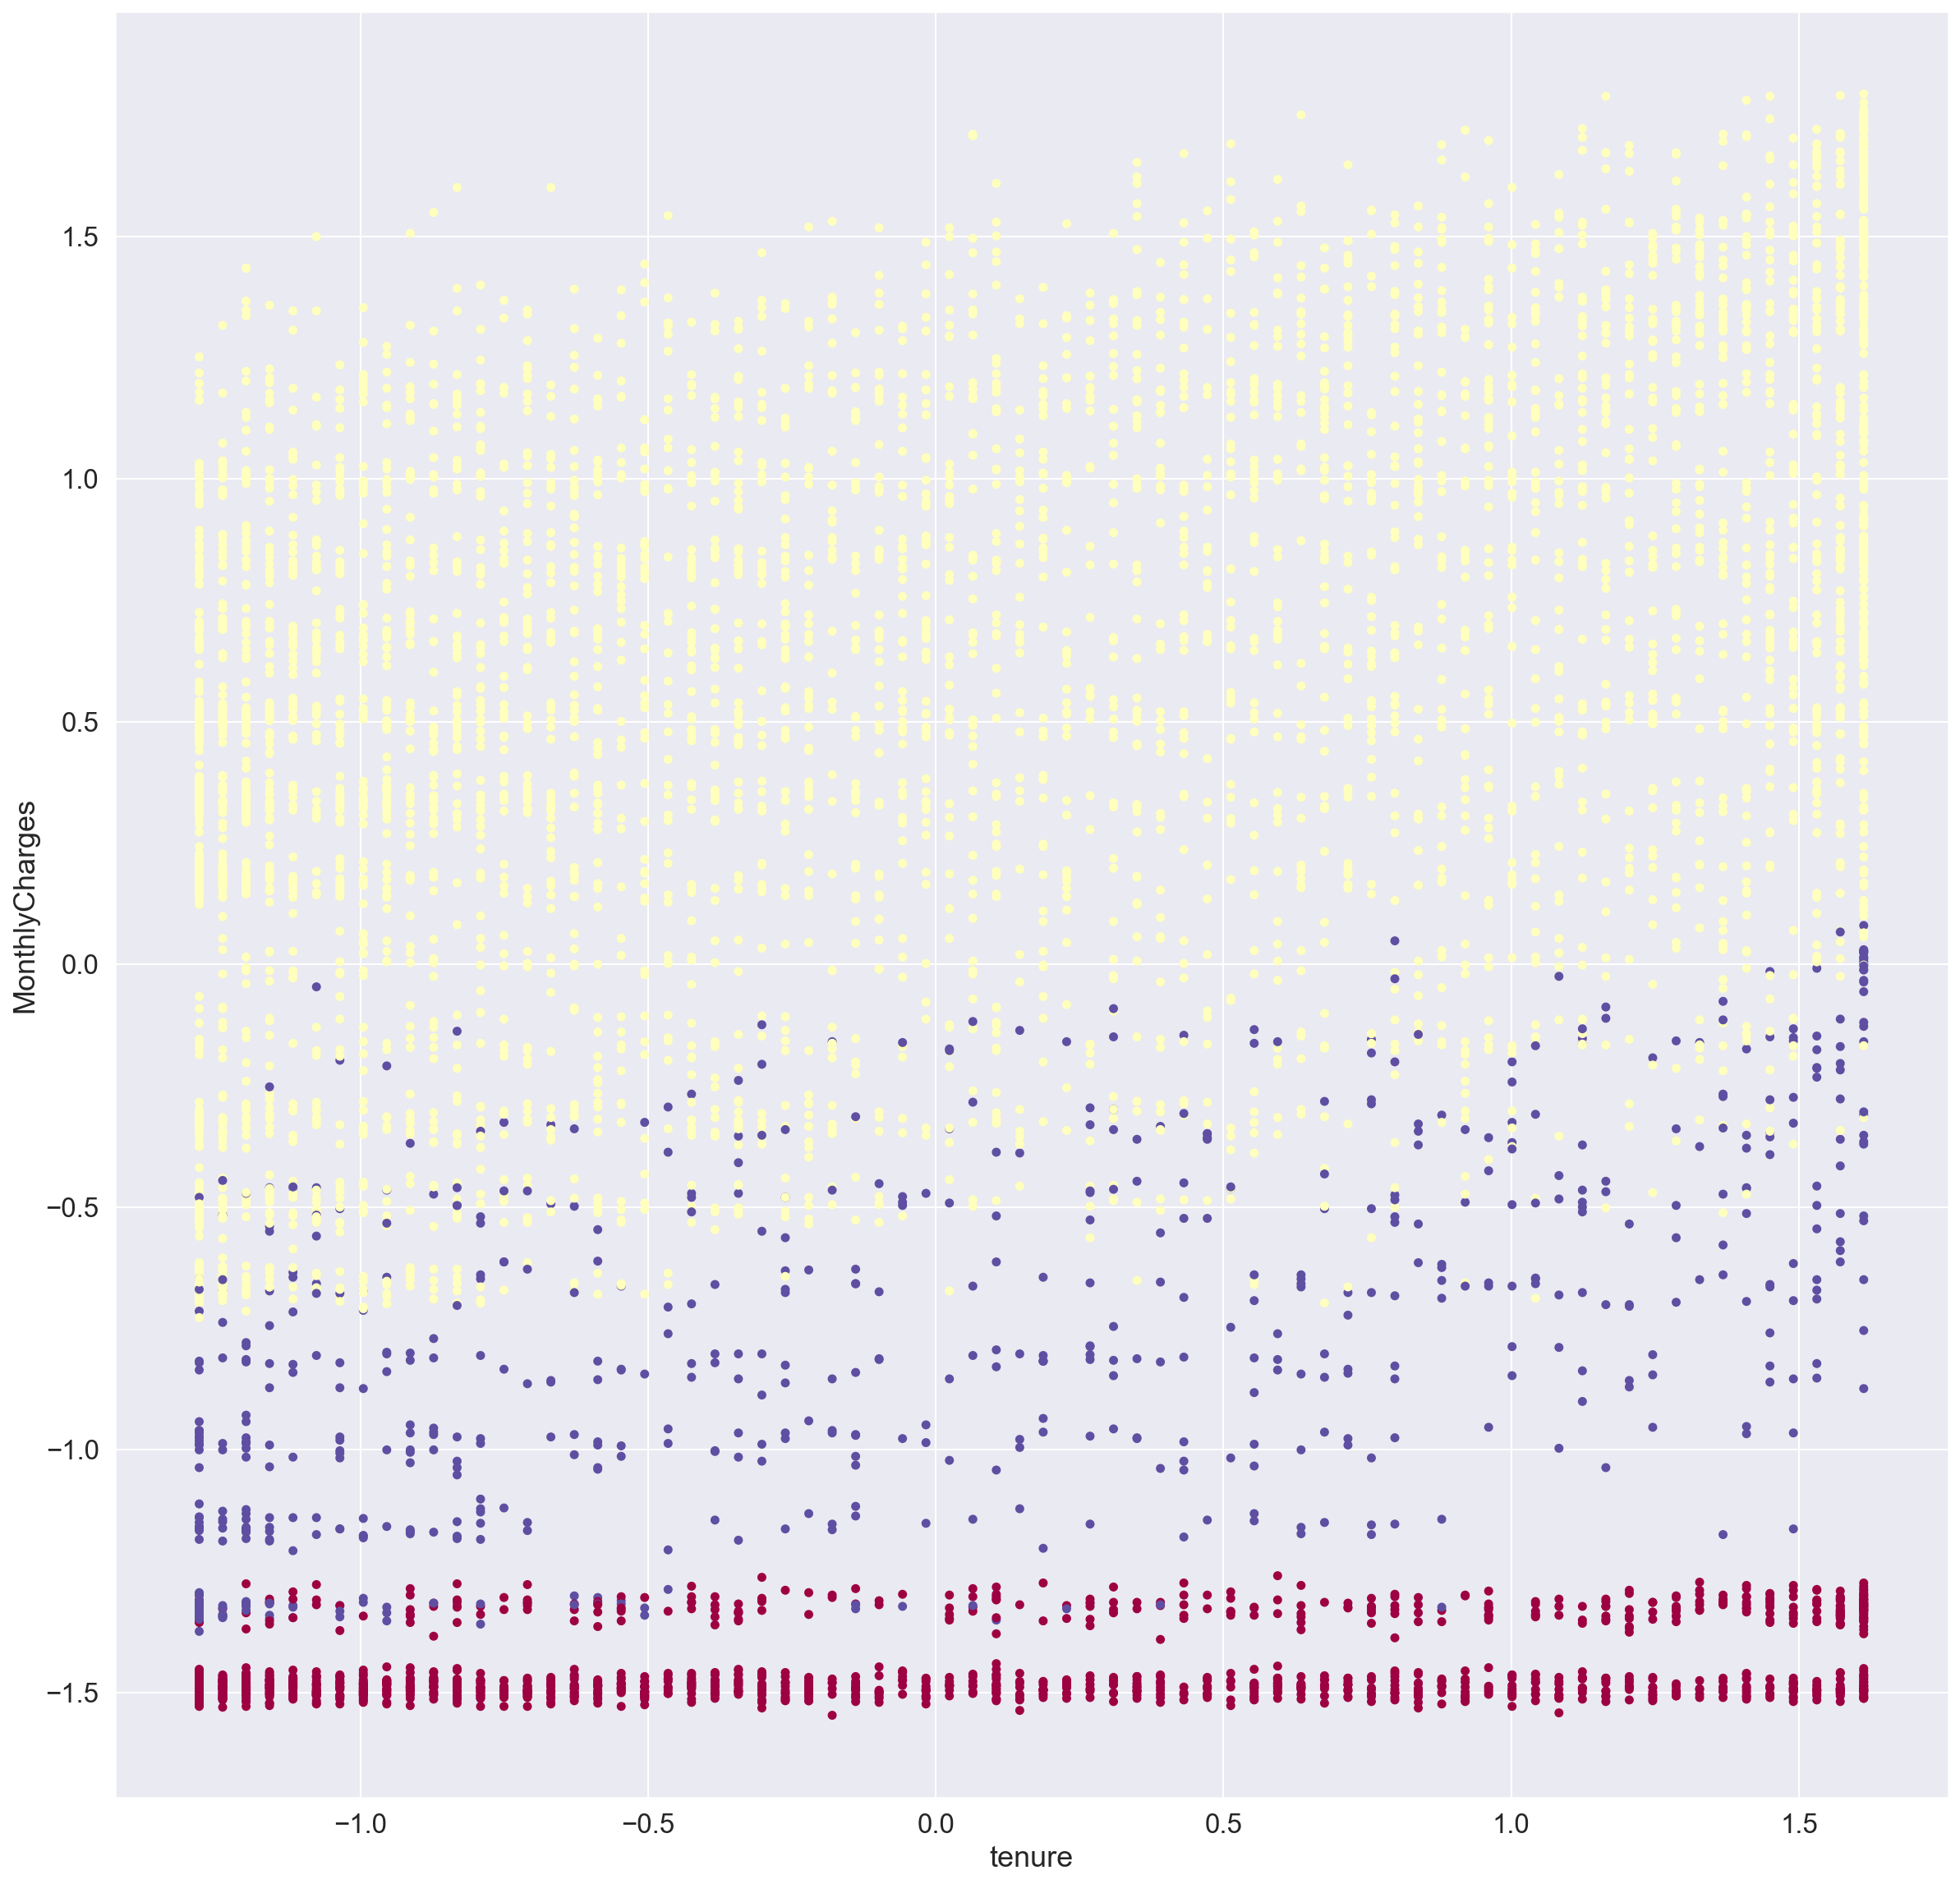

In [133]:
fig, ax = plt.subplots(figsize = (20,20))
X1_std_Kmeans.plot(x = 'tenure', 
                   y = 'MonthlyCharges',
                   kind = 'scatter',
                   c = X1_std_Kmeans['labels'],
                   colormap='Spectral', ax=ax, colorbar=False);

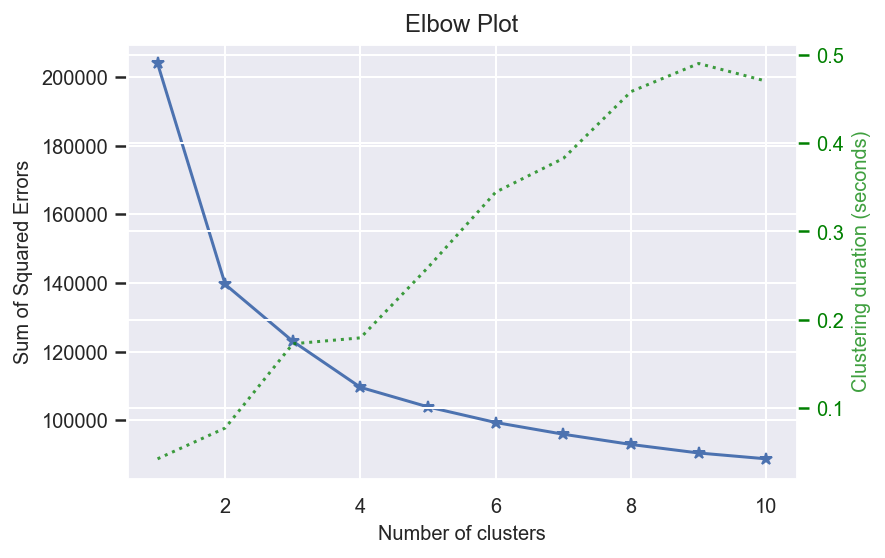

In [134]:
plot_elbow_curve(model_Kmeans, X1_std, cluster_ranges=range(1, 11))
plt.show()

Above suggest that number of clusters = 4 looks like when any further increase is not material to model performance

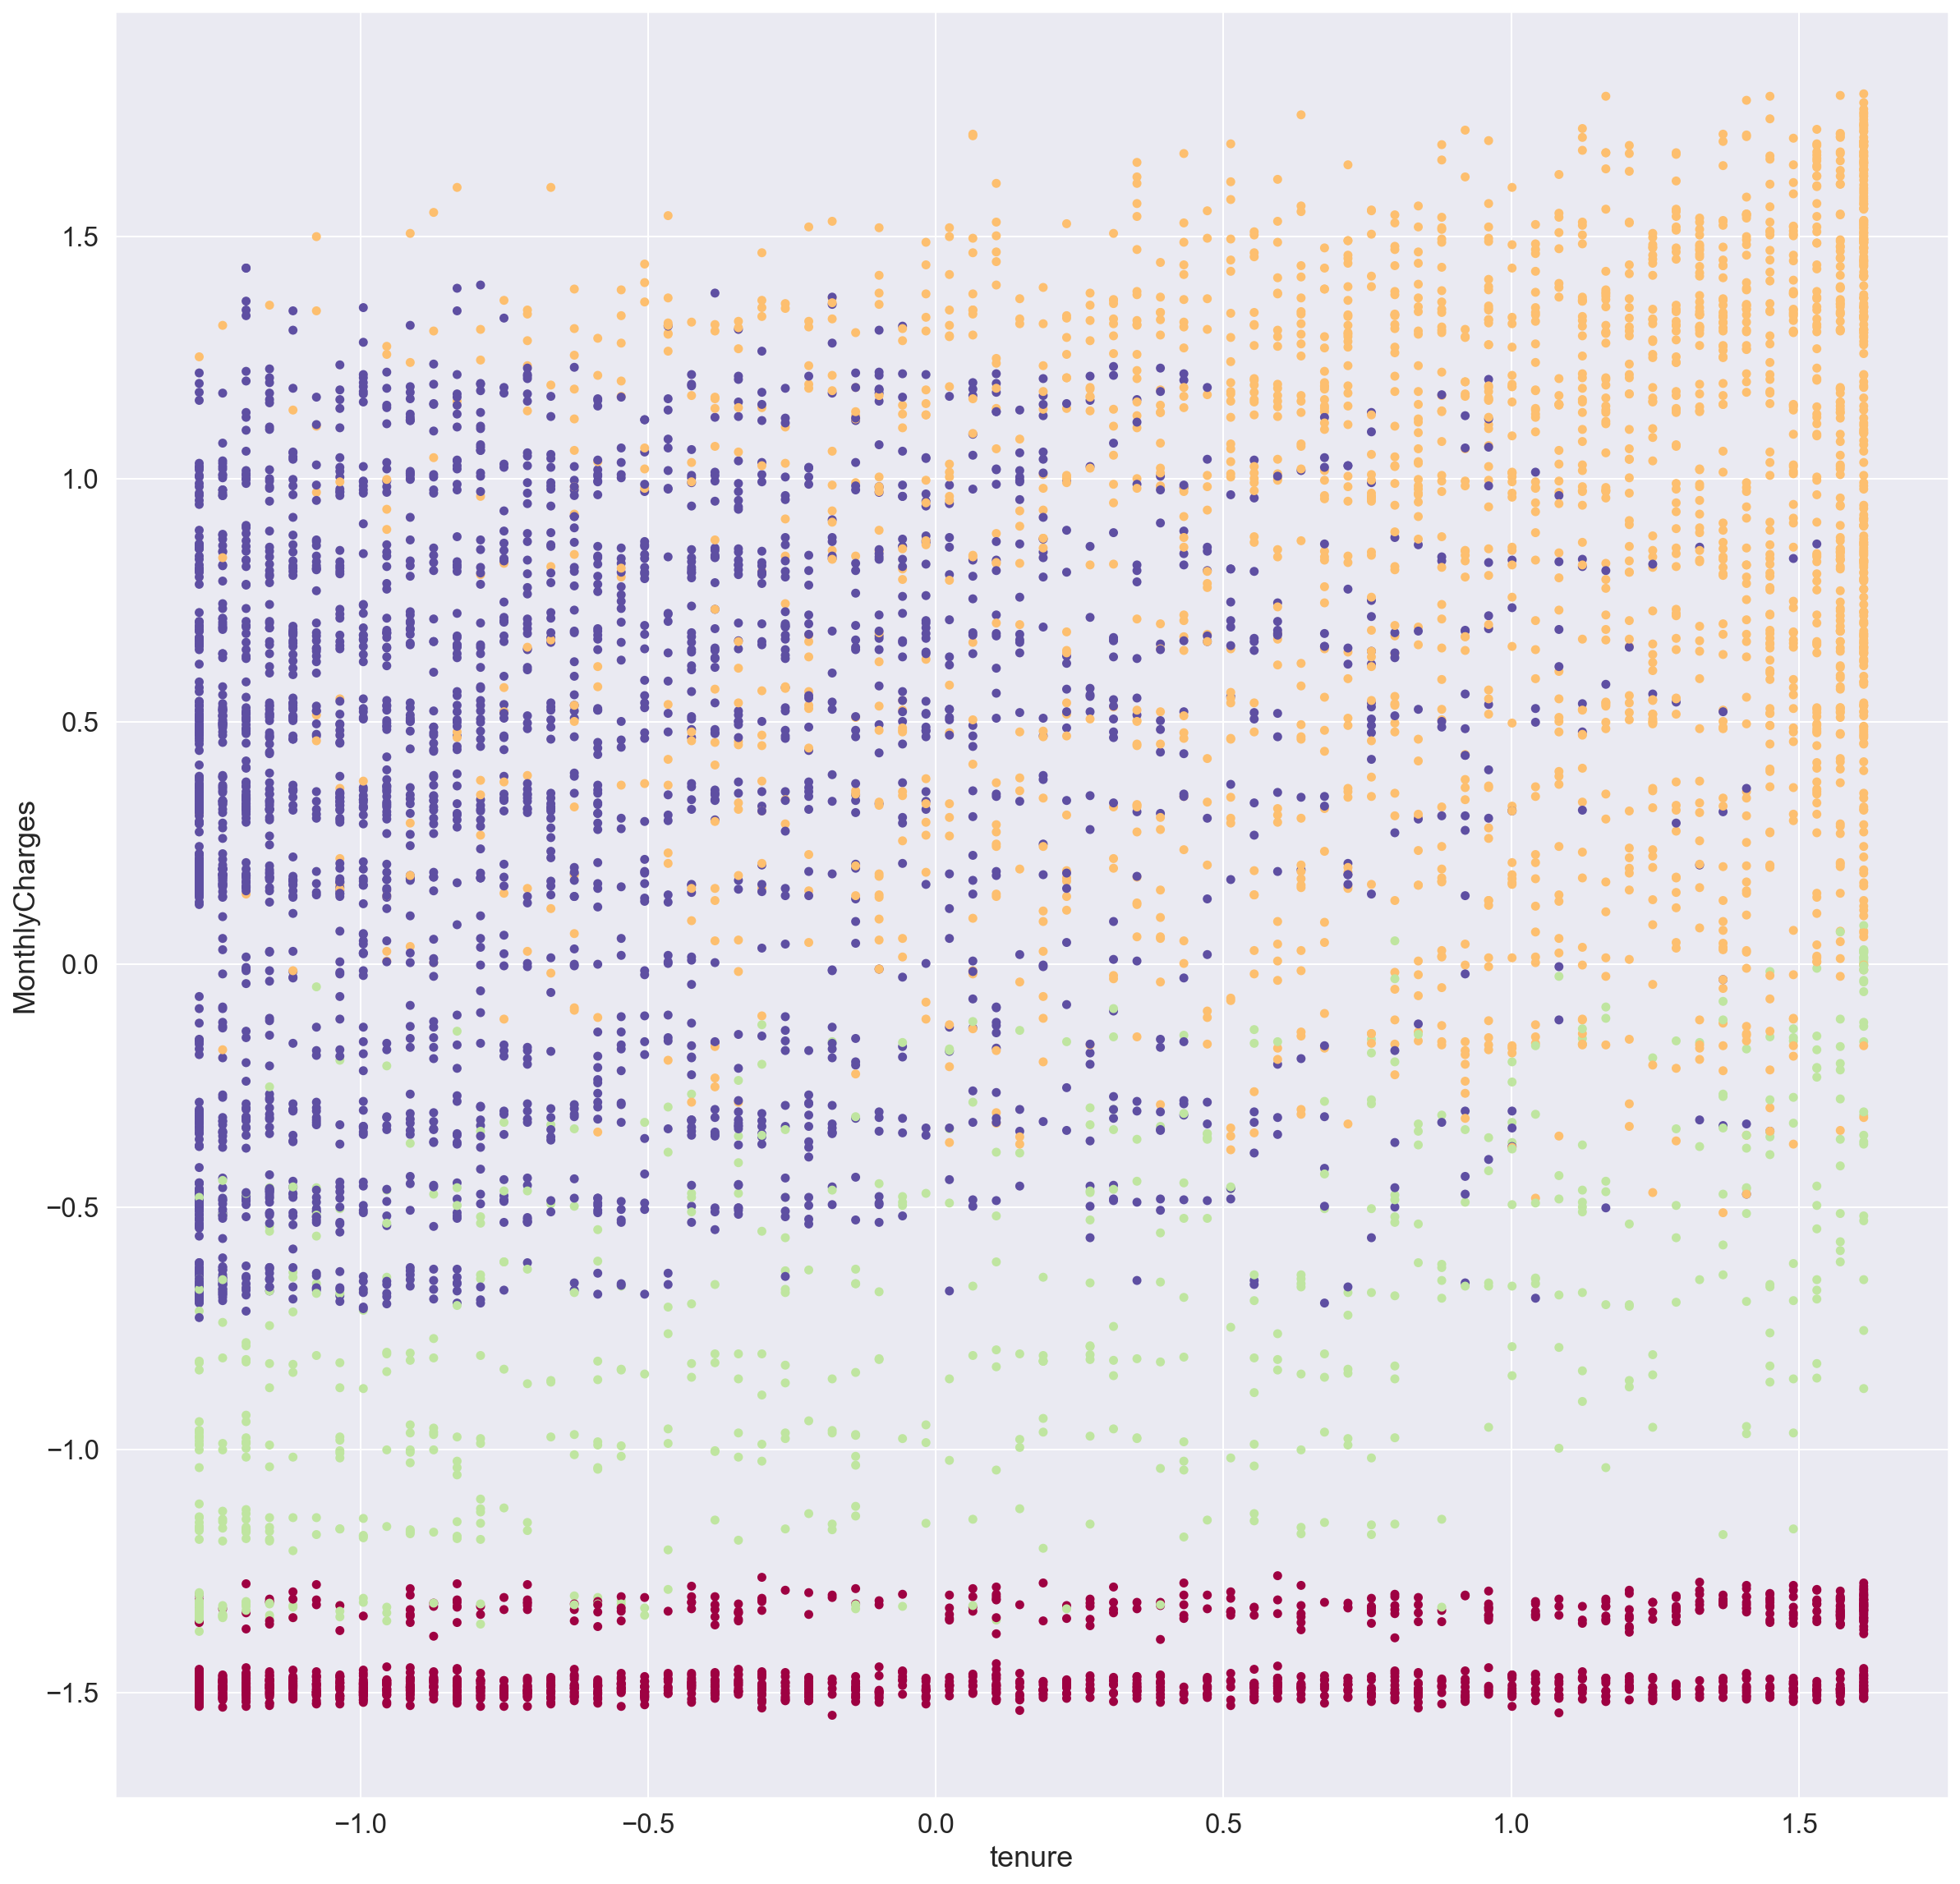

In [135]:
model_Kmeans = KMeans(n_clusters = 4, random_state = 0)
model_Kmeans.fit(X1_std)
cluster_labels = model_Kmeans.labels_
X1_std_Kmeans = X1_std.copy()
X1_std_Kmeans['labels'] = cluster_labels
fig, ax = plt.subplots(figsize = (20,20))
X1_std_Kmeans.plot(x = 'tenure', 
                   y = 'MonthlyCharges',
                   kind = 'scatter',
                   c = X1_std_Kmeans['labels'],
                   colormap='Spectral', ax=ax, colorbar=False);

Now show average values for selected columns to show how groups are differentiated.

In [136]:
cluster_columns = data_dum.columns
Kmeans_summary = pd.DataFrame(index = list(cluster_columns) + ['count'])
for group in list(set(cluster_labels)):
    temp_data = []
    group_mask = X1_std_Kmeans['labels'] == group
    for col in cluster_columns:
        temp_data.append(data_dum[group_mask][col].mean())
    temp_data.append(int(group_mask.sum()))
    Kmeans_summary['group_'+str(group)] = temp_data
temp_data=[]
for col in cluster_columns:
    temp_data.append(data_dum[col].mean())
temp_data.append(len(data_dum))
Kmeans_summary['total_population'] = temp_data
Kmeans_summary

group_0      group_1      group_2  \
tenure                                   30.667763    53.850946    31.830882   
MonthlyCharges                           21.076283    91.174066    41.992500   
TotalCharges                            665.220329  4951.808030  1500.433750   
gender_Male                               0.509211     0.495616     0.516176   
SeniorCitizen_Yes                         0.034211     0.178126     0.152941   
Partner_Yes                               0.482237     0.713429     0.454412   
Dependents_Yes                            0.419079     0.381634     0.300000   
PhoneService_Yes                          1.000000     1.000000     0.000000   
MultipleLines_No phone service            0.000000     0.000000     1.000000   
MultipleLines_Yes                         0.223684     0.713890     0.000000   
InternetService_Fiber optic               0.000000     0.609599     0.000000   
InternetService_No                        1.000000     0.000000     0.000000   
OnlineSecurity_No internet service        1.000000     0.000000     0.000000   
OnlineSecurity_Yes                        0.000000     0.575450     0.413235   
OnlineBackup_No internet service          1.000000     0.000000     0.000000   
OnlineBackup_Yes                          0.000000     0.687125     0.420588   
DeviceProtection_No internet service      1.000000     0.000000     0.000000   
DeviceProtection_Yes                      0.000000     0.713429     0.445588   
TechSupport_No internet service           1.000000     0.000000     0.000000   
TechSupport_Yes                           0.000000     0.608214     0.422059   
StreamingTV_No internet service           1.000000     0.000000     0.000000   
StreamingTV_Yes                           0.000000     0.723120     0.416176   
StreamingMovies_No internet service       1.000000     0.000000     0.000000   
StreamingMovies_Yes                       0.000000     0.724042     0.438235   
Contract_One year                         0.238816     0.362252     0.213235   
Contract_Two year                         0.416447     0.405168     0.233824   
PaperlessBilling_Yes                      0.292763     0.670512     0.567647   
PaymentMethod_Credit card (automatic)     0.217763     0.339640     0.225000   
PaymentMethod_Electronic check            0.080263     0.251961     0.332353   
PaymentMethod_Mailed check                0.483553     0.095524     0.233824   
Churn_Yes                                 0.074342     0.149977     0.250000   
count                                  1520.000000  2167.000000   680.000000   

                                           group_3  total_population  
tenure                                   16.148218         32.421786  
MonthlyCharges                           74.107298         64.798208  
TotalCharges                           1236.086623       2283.300441  
gender_Male                               0.506567          0.504693  
SeniorCitizen_Yes                         0.225141          0.162400  
Partner_Yes                               0.302064          0.482509  
Dependents_Yes                            0.161726          0.298493  
PhoneService_Yes                          1.000000          0.903299  
MultipleLines_No phone service            0.000000          0.096701  
MultipleLines_Yes                         0.405253          0.421928  
InternetService_Fiber optic               0.666041          0.440273  
InternetService_No                        0.000000          0.216155  
OnlineSecurity_No internet service        0.000000          0.216155  
OnlineSecurity_Yes                        0.182739          0.286547  
OnlineBackup_No internet service          0.000000          0.216155  
OnlineBackup_Yes                          0.243902          0.344852  
DeviceProtection_No internet service      0.000000          0.216155  
DeviceProtection_Yes                      0.213508          0.343857  
TechSupport_No internet service           0.000000   

In [137]:
cluster_columns = ['InternetService_No', 'InternetService_Fiber optic', 'PhoneService_Yes',
                  'Partner_Yes', 'Dependents_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                   'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
                   'Contract_One year', 'Contract_Two year',
                   'MonthlyCharges','tenure', 'Churn_Yes']
Kmeans_summary = pd.DataFrame(index = cluster_columns + ['count'])
for group in list(set(cluster_labels)):
    temp_data = []
    group_mask = X1_std_Kmeans['labels'] == group
    for col in cluster_columns:
        temp_data.append(data_dum[group_mask][col].mean())
    temp_data.append(int(group_mask.sum()))
    Kmeans_summary['group_'+str(group)] = temp_data
temp_data=[]
for col in cluster_columns:
    temp_data.append(data_dum[col].mean())
temp_data.append(len(data_dum))
Kmeans_summary['total_population'] = temp_data
Kmeans_summary

group_0      group_1     group_2  \
InternetService_No              1.000000     0.000000    0.000000   
InternetService_Fiber optic     0.000000     0.609599    0.000000   
PhoneService_Yes                1.000000     1.000000    0.000000   
Partner_Yes                     0.482237     0.713429    0.454412   
Dependents_Yes                  0.419079     0.381634    0.300000   
OnlineSecurity_Yes              0.000000     0.575450    0.413235   
OnlineBackup_Yes                0.000000     0.687125    0.420588   
DeviceProtection_Yes            0.000000     0.713429    0.445588   
TechSupport_Yes                 0.000000     0.608214    0.422059   
StreamingTV_Yes                 0.000000     0.723120    0.416176   
Contract_One year               0.238816     0.362252    0.213235   
Contract_Two year               0.416447     0.405168    0.233824   
MonthlyCharges                 21.076283    91.174066   41.992500   
tenure                         30.667763    53.850946   31.830882   
Churn_Yes                       0.074342     0.149977    0.250000   
count                        1520.000000  2167.000000  680.000000   

                                 group_3  total_population  
InternetService_No              0.000000          0.216155  
InternetService_Fiber optic     0.666041          0.440273  
PhoneService_Yes                1.000000          0.903299  
Partner_Yes                     0.302064          0.482509  
Dependents_Yes                  0.161726          0.298493  
OnlineSecurity_Yes              0.182739          0.286547  
OnlineBackup_Yes                0.243902          0.344852  
DeviceProtection_Yes            0.213508          0.343857  
TechSupport_Yes                 0.163227          0.290102  
StreamingTV_Yes                 0.320075          0.384386  
Contract_One year               0.067167          0.209329  
Contract_Two year               0.005629          0.239619  
MonthlyCharges                 74.107298         64.798208  
tenure                         16.148218         32.421786  
Churn_Yes                       0.473171          0.265785  
count                        2665.000000       7032.000000

This has found 4 groups which are loosely defined by:

- Group 0: The only group with no internet service - i.e. only have phone service. These have very low rates of churn at 7% vs population of 27%.

- Group 1: This group has phone and internet service, and a much higher likelihood of having a partner and dependents 71% and 38% vs population average of 48% and 30%. Take up for additional services such as Online security, online backup, streaming tv, was also much more prevalent,  This group has lower rates of churn than average (15% vs 27%) and longer average tenure (54 months vs 32 months).

- Group 2: This group has no phone and has adsl internet service. Rates of churn are in line with population average

- Group 3: This group is similar to Group 1 but more likely to be single without dependents. They take up less additional services as well as being muhch less likely to be on contracts. These have the highest rates of churn - almost 47% and much shorter tenure (16 months).

### Hierarchical clustering

In [138]:
Z1 = linkage(X1_std, method = 'ward', metric = 'euclidean')
Z1.shape

(7031, 4)

In [139]:
cophenet(Z1, pdist(X1_std, metric='euclidean'))[0]

0.8559986663137505

Reasonably high cophenetic correlation coefficient meaning that observations close to each other in feature space have been merged into clusters first.

In [140]:
link = pd.DataFrame(Z1, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])

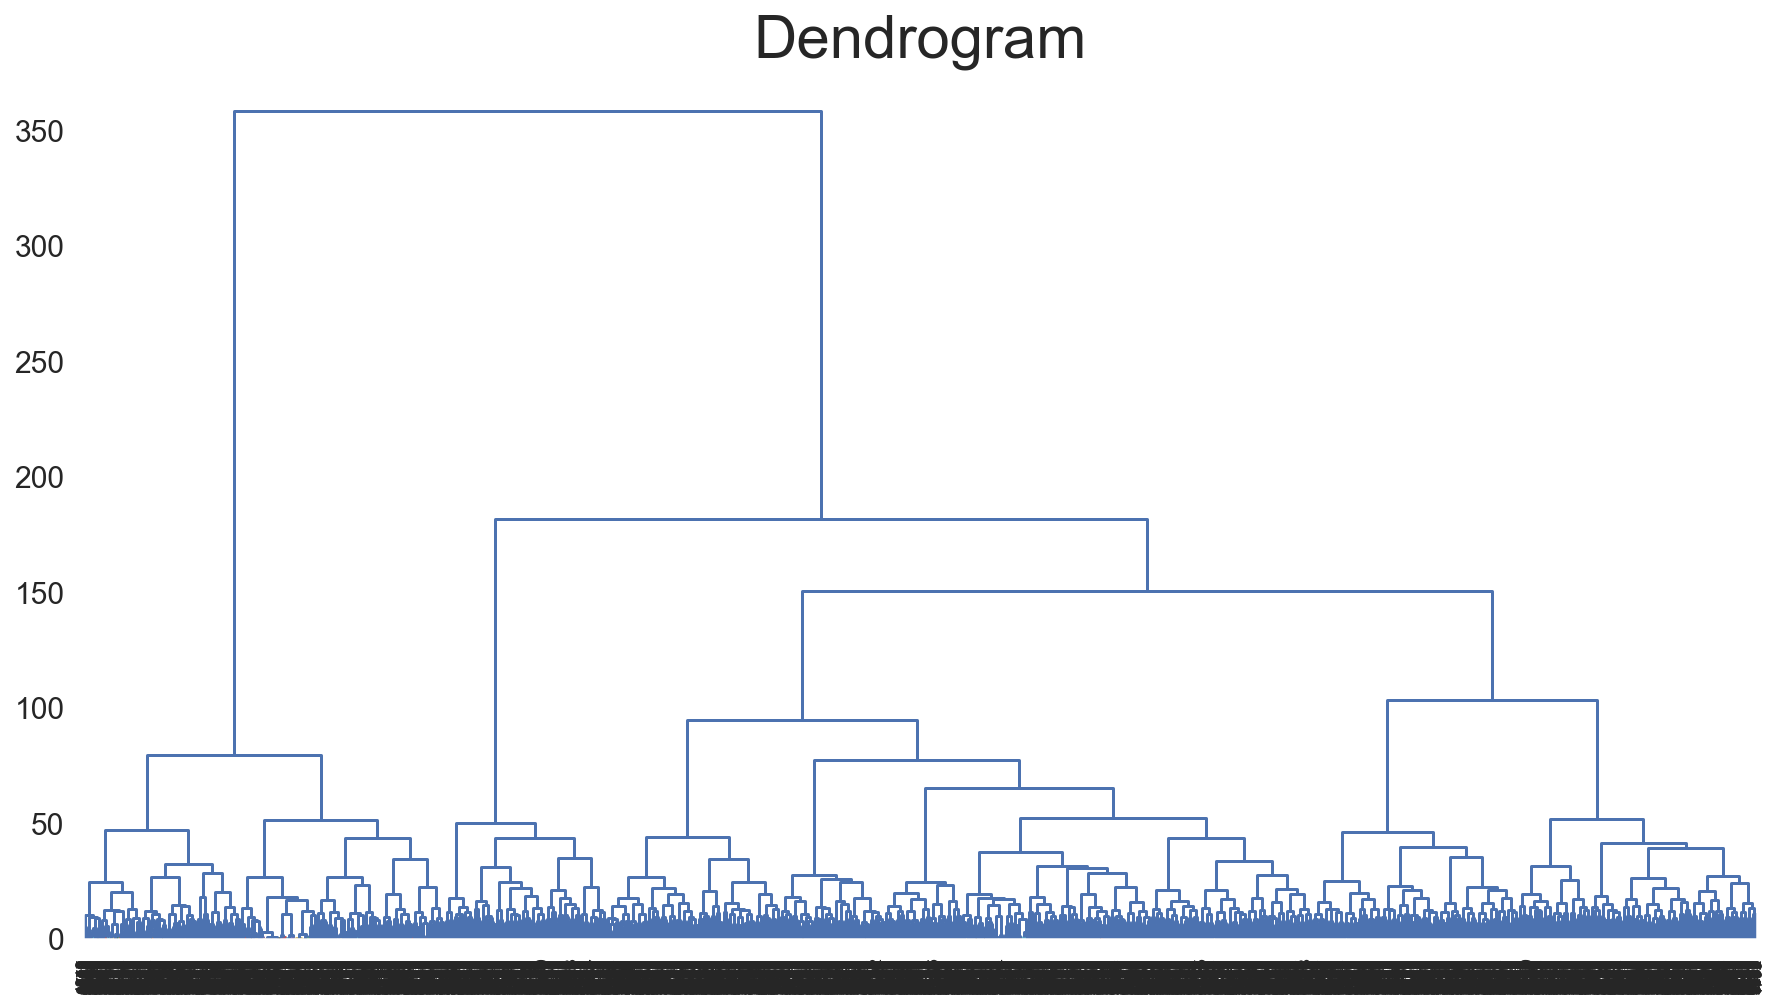

In [141]:
plt.figure(figsize=(15, 8))
dendrogram(
    Z1,
    orientation='top',
    leaf_rotation=90.,  
    leaf_font_size=8.,
    color_threshold=1,
    #p = 10,
    #truncate_mode='level'
    #truncate_mode='lastp'
)
plt.yticks(fontsize=15.)
plt.title('Dendrogram',fontsize=30)

plt.show()

In [142]:
clusters = fcluster(Z1, 4, criterion='maxclust')
clusters.shape

(7032,)

In [143]:
X1_std_HC = X1_std.copy()
X1_std_HC['labels'] = clusters

In [144]:
cluster_columns = ['InternetService_No', 'InternetService_Fiber optic', 'PhoneService_Yes',
                  'Partner_Yes', 'Dependents_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                   'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
                   'Contract_One year', 'Contract_Two year',
                   'MonthlyCharges','tenure', 'Churn_Yes']
HC_summary = pd.DataFrame(index = cluster_columns + ['count'])
for group in list(set(clusters)):
    temp_data = []
    group_mask = X1_std_HC['labels'] == group
    for col in cluster_columns:
        temp_data.append(data_dum[group_mask][col].mean())
    temp_data.append(int(group_mask.sum()))
    HC_summary['group_'+str(group)] = temp_data
temp_data=[]
for col in cluster_columns:
    temp_data.append(data_dum[col].mean())
temp_data.append(len(data_dum))
HC_summary['total_population'] = temp_data
HC_summary

group_1     group_2      group_3  \
InternetService_No              1.000000    0.000000     0.000000   
InternetService_Fiber optic     0.000000    0.000000     0.705466   
PhoneService_Yes                1.000000    0.000000     1.000000   
Partner_Yes                     0.482237    0.454412     0.355263   
Dependents_Yes                  0.419079    0.300000     0.175101   
OnlineSecurity_Yes              0.000000    0.413235     0.194332   
OnlineBackup_Yes                0.000000    0.420588     0.303981   
DeviceProtection_Yes            0.000000    0.445588     0.281039   
TechSupport_Yes                 0.000000    0.422059     0.206815   
StreamingTV_Yes                 0.000000    0.416176     0.384278   
Contract_One year               0.238816    0.213235     0.025304   
Contract_Two year               0.416447    0.233824     0.018556   
MonthlyCharges                 21.076283   41.992500    77.541026   
tenure                         30.667763   31.830882    19.561404   
Churn_Yes                       0.074342    0.250000     0.463563   
count                        1520.000000  680.000000  2964.000000   

                                 group_4  total_population  
InternetService_No              0.000000          0.216155  
InternetService_Fiber optic     0.538009          0.440273  
PhoneService_Yes                1.000000          0.903299  
Partner_Yes                     0.694861          0.482509  
Dependents_Yes                  0.395610          0.298493  
OnlineSecurity_Yes              0.619914          0.286547  
OnlineBackup_Yes                0.662741          0.344852  
DeviceProtection_Yes            0.686296          0.343857  
TechSupport_Yes                 0.610278          0.290102  
StreamingTV_Yes                 0.685760          0.384386  
Contract_One year               0.475910          0.209329  
Contract_Two year               0.448608          0.239619  
MonthlyCharges                 88.457468         64.798208  
tenure                         54.470021         32.421786  
Churn_Yes                       0.113490          0.265785  
count                        1868.000000       7032.000000

In [145]:
Kmeans_summary

group_0      group_1     group_2  \
InternetService_No              1.000000     0.000000    0.000000   
InternetService_Fiber optic     0.000000     0.609599    0.000000   
PhoneService_Yes                1.000000     1.000000    0.000000   
Partner_Yes                     0.482237     0.713429    0.454412   
Dependents_Yes                  0.419079     0.381634    0.300000   
OnlineSecurity_Yes              0.000000     0.575450    0.413235   
OnlineBackup_Yes                0.000000     0.687125    0.420588   
DeviceProtection_Yes            0.000000     0.713429    0.445588   
TechSupport_Yes                 0.000000     0.608214    0.422059   
StreamingTV_Yes                 0.000000     0.723120    0.416176   
Contract_One year               0.238816     0.362252    0.213235   
Contract_Two year               0.416447     0.405168    0.233824   
MonthlyCharges                 21.076283    91.174066   41.992500   
tenure                         30.667763    53.850946   31.830882   
Churn_Yes                       0.074342     0.149977    0.250000   
count                        1520.000000  2167.000000  680.000000   

                                 group_3  total_population  
InternetService_No              0.000000          0.216155  
InternetService_Fiber optic     0.666041          0.440273  
PhoneService_Yes                1.000000          0.903299  
Partner_Yes                     0.302064          0.482509  
Dependents_Yes                  0.161726          0.298493  
OnlineSecurity_Yes              0.182739          0.286547  
OnlineBackup_Yes                0.243902          0.344852  
DeviceProtection_Yes            0.213508          0.343857  
TechSupport_Yes                 0.163227          0.290102  
StreamingTV_Yes                 0.320075          0.384386  
Contract_One year               0.067167          0.209329  
Contract_Two year               0.005629          0.239619  
MonthlyCharges                 74.107298         64.798208  
tenure                         16.148218         32.421786  
Churn_Yes                       0.473171          0.265785  
count                        2665.000000       7032.000000

This has identified similar groups. Group 1 and Group 2 from the Hierarchical Clustering are equal to Group 0 and Group 2 from the Kmeans clustering. Groups 3 and 4 are similar to Groups 3 and 1 from the Kmeans clustering but characteristics remain the same.

### DBSCAN clustering

In [146]:
dbscan = DBSCAN(eps = 3.5, min_samples = 3)
dbscan.fit(X1_std)
labels = dbscan.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([  79,  651, 4779, 1520,    3]))

In [147]:
X1_std_DBSCAN = X1_std.copy()
X1_std_DBSCAN['labels'] = labels

In [148]:
cluster_columns = list(X1.columns)
DBSCAN_summary = pd.DataFrame(index = cluster_columns + ['count'])
for group in list(set(labels)):
    temp_data = []
    group_mask = X1_std_DBSCAN['labels'] == group
    for col in cluster_columns:
        temp_data.append(data_dum[group_mask][col].mean())
    temp_data.append(int(group_mask.sum()))
    DBSCAN_summary['group_'+str(group)] = temp_data
temp_data=[]
for col in cluster_columns:
    temp_data.append(data_dum[col].mean())
temp_data.append(len(data_dum))
DBSCAN_summary['total_population'] = temp_data
DBSCAN_summary

group_0      group_1      group_2  \
tenure                                  31.420891    32.993304    30.667763   
MonthlyCharges                          41.870891    81.791714    21.076283   
gender_Male                              0.514593     0.501779     0.509211   
SeniorCitizen_Yes                        0.135177     0.198368     0.034211   
Partner_Yes                              0.442396     0.485457     0.482237   
Dependents_Yes                           0.294931     0.259050     0.419079   
PhoneService_Yes                         0.000000     1.000000     1.000000   
MultipleLines_No phone service           1.000000     0.000000     0.000000   
MultipleLines_Yes                        0.000000     0.544465     0.223684   
InternetService_Fiber optic              0.000000     0.643022     0.000000   
InternetService_No                       0.000000     0.000000     1.000000   
OnlineSecurity_No internet service       0.000000     0.000000     1.000000   
OnlineSecurity_Yes                       0.414747     0.357188     0.000000   
OnlineBackup_No internet service         0.000000     0.000000     1.000000   
OnlineBackup_Yes                         0.413210     0.441515     0.000000   
DeviceProtection_No internet service     0.000000     0.000000     1.000000   
DeviceProtection_Yes                     0.439324     0.436911     0.000000   
TechSupport_No internet service          0.000000     0.000000     1.000000   
TechSupport_Yes                          0.427035     0.359071     0.000000   
StreamingTV_No internet service          0.000000     0.000000     1.000000   
StreamingTV_Yes                          0.410138     0.500942     0.000000   
StreamingMovies_No internet service      0.000000     0.000000     1.000000   
StreamingMovies_Yes                      0.436252     0.503871     0.000000   
Contract_One year                        0.204301     0.196275     0.238816   
Contract_Two year                        0.235023     0.184348     0.416447   
PaperlessBilling_Yes                     0.569892     0.693032     0.292763   
PaymentMethod_Credit card (automatic)    0.218126     0.214271     0.217763   
PaymentMethod_Electronic check           0.341014     0.419753     0.080263   
PaymentMethod_Mailed check               0.228879     0.144591     0.483553   
count                                  651.000000  4779.000000  1520.000000   

                                         group_3   group_-1  total_population  
tenure                                 42.000000  39.481013         32.421786  
MonthlyCharges                         74.716667  66.586709         64.798208  
gender_Male                             0.666667   0.506329          0.504693  
SeniorCitizen_Yes                       1.000000   0.645570          0.162400  
Partner_Yes                             1.000000   0.620253          0.482509  
Dependents_Yes                          0.000000   0.405063          0.298493  
PhoneService_Yes                        1.000000   0.632911          0.903299  
MultipleLines_No phone service          0.000000   0.367089          0.096701  
MultipleLines_Yes                       1.000000   0.278481          0.421928  
InternetService_Fiber optic             0.333333   0.278481          0.440273  
InternetService_No                      0.000000   0.000000          0.216155  
OnlineSecurity_No internet service      0.000000   0.000000          0.216155  
OnlineSecurity_Yes                      0.000000   0.481013          0.286547  
OnlineBackup_No internet service        0.000000   0.000000          0.216155  
OnlineBackup_Yes                        1.000000   0.544304          0.344852  
DeviceProtection_No internet service    0.000000   0.000000          0.216155  
DeviceProtection_Yes                    0.333333   0.544304          0.343857  
TechSupport_No internet service         0.000000   0.000000          0.216155  
TechSupport_Yes                         0.000000   0.582278          0.2